In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [4]:
# Load the CSV file into a DataFrame
online_retail = pd.read_excel("/Users/chi-chi/Documents/Online Retail.xlsx")

# Access the data in the DataFrame
print(online_retail.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [5]:
# Check the number of rows and columns
print("Number of rows:", online_retail.shape[0])
print("Number of columns:", online_retail.shape[1])

# Display the data types of each column
print("Data types:\n", online_retail.dtypes)

Number of rows: 541909
Number of columns: 8
Data types:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [6]:
# Check for missing values in each column
print("Missing Values:\n", online_retail.isnull().sum())

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
#filter out rows with empty customer ID's
df_filtered = online_retail[online_retail['CustomerID'].notna()]
# Check for missing values in each column
print("Missing Values:\n", df_filtered.isnull().sum())

Missing Values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", df_filtered.describe())

Summary Statistics:
             Quantity                    InvoiceDate      UnitPrice   
count  406829.000000                         406829  406829.000000  \
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [9]:
#Analyse the rows with negative quantities separately as bad sales
good_sales = df_filtered[df_filtered['Quantity'] > 0]
bad_sales = df_filtered[df_filtered['Quantity'] < 0]
# Get summary statistics for numerical columns
print("Summary Statistics:\n", good_sales.describe())

Summary Statistics:
             Quantity                    InvoiceDate      UnitPrice   
count  397924.000000                         397924  397924.000000  \
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID  
count  397924.000000  
mean    15294.315171  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.169877  


In [10]:
#Analyse the rows with zero unit prices to support the hypothesis that those were promotional items
promo_sales = good_sales[good_sales['UnitPrice'] == 0]
promo_sales

InvoiceNo StockCode                          Description  Quantity   
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1  \
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice  CustomerID         Country  
9302   2010-12-05 14:02:00        0.0     12647.0         Germany  
33576  2010-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089  2010-12-21 13:45:00        0.0     14911.0            EIRE  
47068  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
56674  2011-01-13 15:10:00        0.0     15107.0  United Kingdom  
86789  2011-02-10 13:08:00        0.0     17560.0  United Kingdom  
130188 2011-03-23 10:25:00        0.0     13239.0  United Kingdom  
139453 2011-03-30 12:45:00        0.0     13113.0  United Kingdom  
145208 2011-04-04 14:42:00        0.0     14410.0  United Kingdom  
157042 2011-04-14 18:57:00        0.0     12457.0     Switzerland  
187613 2011-05-12 15:21:00       

In [11]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", promo_sales.describe())

Summary Statistics:
            Quantity                 InvoiceDate  UnitPrice    CustomerID
count     40.000000                          40       40.0     40.000000
mean     347.100000  2011-07-26 08:19:34.500000        0.0  14217.225000
min        1.000000         2010-12-05 14:02:00        0.0  12415.000000
25%        1.000000         2011-04-12 05:53:15        0.0  12722.750000
50%        4.500000         2011-08-26 14:19:00        0.0  13985.000000
75%       24.000000         2011-11-05 06:16:45        0.0  15225.500000
max    12540.000000         2011-11-25 15:57:00        0.0  18059.000000
std     1978.311813                         NaN        0.0   1676.321178


In [12]:
nonpromo_sales = good_sales[good_sales['UnitPrice'] > 0]
nonpromo_sales.head()

InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [13]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", nonpromo_sales.describe())

Summary Statistics:
             Quantity                    InvoiceDate      UnitPrice   
count  397884.000000                         397884  397884.000000  \
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID  
count  397884.000000  
mean    15294.423453  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.141560  


In [14]:
promo_merged = pd.merge(nonpromo_sales,promo_sales,left_on='InvoiceNo',right_on='InvoiceNo',how='outer')
promo_merged.tail(10)

InvoiceNo StockCode_x                    Description_x  Quantity_x   
398071    581587       23254    CHILDRENS CUTLERY DOLLY GIRL          4.0  \
398072    581587       23255  CHILDRENS CUTLERY CIRCUS PARADE         4.0   
398073    581587       22138    BAKING SET 9 PIECE RETROSPOT          3.0   
398074    543599         NaN                              NaN         NaN   
398075    564651         NaN                              NaN         NaN   
398076    564651         NaN                              NaN         NaN   
398077    564651         NaN                              NaN         NaN   
398078    564651         NaN                              NaN         NaN   
398079    568384         NaN                              NaN         NaN   
398080    578841         NaN                              NaN         NaN   

             InvoiceDate_x  UnitPrice_x  CustomerID_x Country_x StockCode_y   
398071 2011-12-09 12:50:00         4.15       12680.0    France         NaN  \
398072 2011-12-09 12:50:00         4.15       12680.0    France         NaN   
398073 2011-12-09 12:50:00         4.95       12680.0    France         NaN   
398074                 NaT          NaN           NaN       NaN      84535B   
398075                 NaT          NaN           NaN       NaN       23270   
398076                 NaT          NaN           NaN       NaN       23268   
398077                 NaT          NaN           NaN       NaN       22955   
398078                 NaT          NaN           NaN       NaN       21786   
398079                 NaT          NaN           NaN       NaN           M   
398080                 NaT          NaN           NaN       NaN       84826   

                              Description_y  Quantity_y       InvoiceDate_y   
398071                                  NaN         NaN                 NaT  \
398072                                  NaN         NaN                 NaT   
398073                                  NaN         NaN                 NaT   
398074         FAIRY CAKES NOTEBOOK A6 SIZE        16.0 2011-02-10 13:08:00   
398075     SET OF 2 CERAMIC PAINTED HEARTS         96.0 2011-08-26 14:19:00   
398076  SET OF 2 CERAMIC CHRISTMAS REINDEER       192.0 2011-08-26 14:19:00   
398077             36 FOIL STAR CAKE CASES        144.0 2011-08-26 14:19:00   
398078                   POLKADOT RAIN HAT        144.0 2011-08-26 14:19:00   
398079                               Manual         1.0 2011-09-27 09:46:00   
398080       ASSTD DESIGN 3D PAPER STICKERS     12540.0 2011-11-25 15:57:00   

        UnitPrice_y  CustomerID_y       Country_y  
398071          NaN           NaN             NaN  
398072          NaN           NaN             NaN  
398073          NaN           NaN             NaN  
398074          0.0       17560.0  United Kingdom  
398075          0.0       14646.0     Netherlands  
398076          0.0       14646.0     Netherlands  
398077          0.0       14646.0     Netherlands  
398078          0.0       14646.0     Netherlands  
398079          0.0       12748.0  United Kingdom  
398080          0.0       13256.0  United Kingdom

In [15]:
# 7 of the "promo sales" were not linked to any paid transaction

In [16]:
# Get summary statistics for non-numerical columns
print("Summary Statistics:\n", good_sales.describe(include='object'))

Summary Statistics:
         InvoiceNo StockCode                         Description   
count      397924    397924                              397924  \
unique      18536      3665                                3877   
top        576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq          542      2035                                2028   

               Country  
count           397924  
unique              37  
top     United Kingdom  
freq            354345  


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

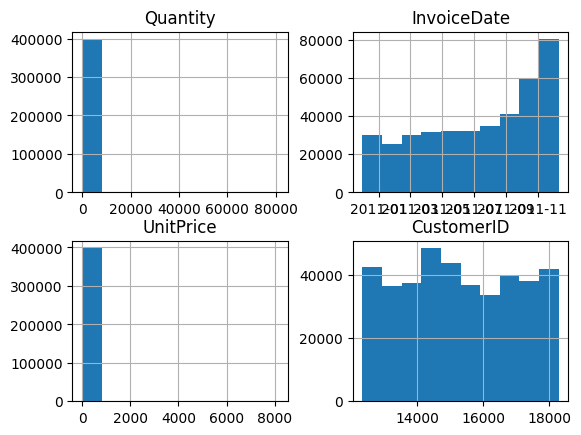

In [17]:
#Plot the histograms
fig, axis = plt.subplots(2, 2)
good_sales.hist(ax=axis)

Text(0.5, 1.0, 'Top 10 Quantities Bought and their Frequencies')

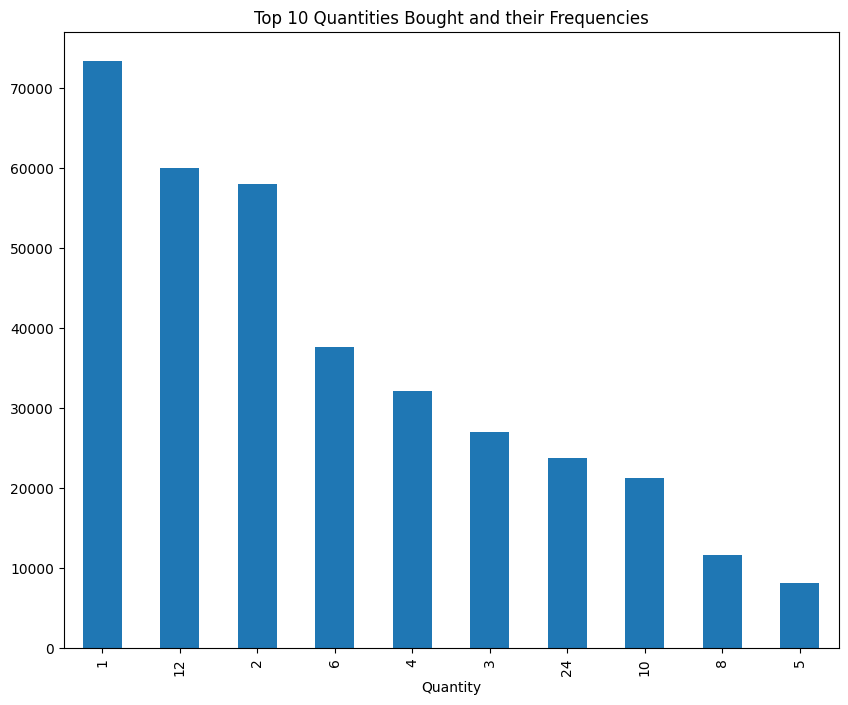

In [18]:
#Plot the histograms
quantity = good_sales['Quantity'].value_counts()[:10]
quantity.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Quantities Bought and their Frequencies')

Text(0.5, 1.0, 'Top 20 Dates of Sales and their Frequencies')

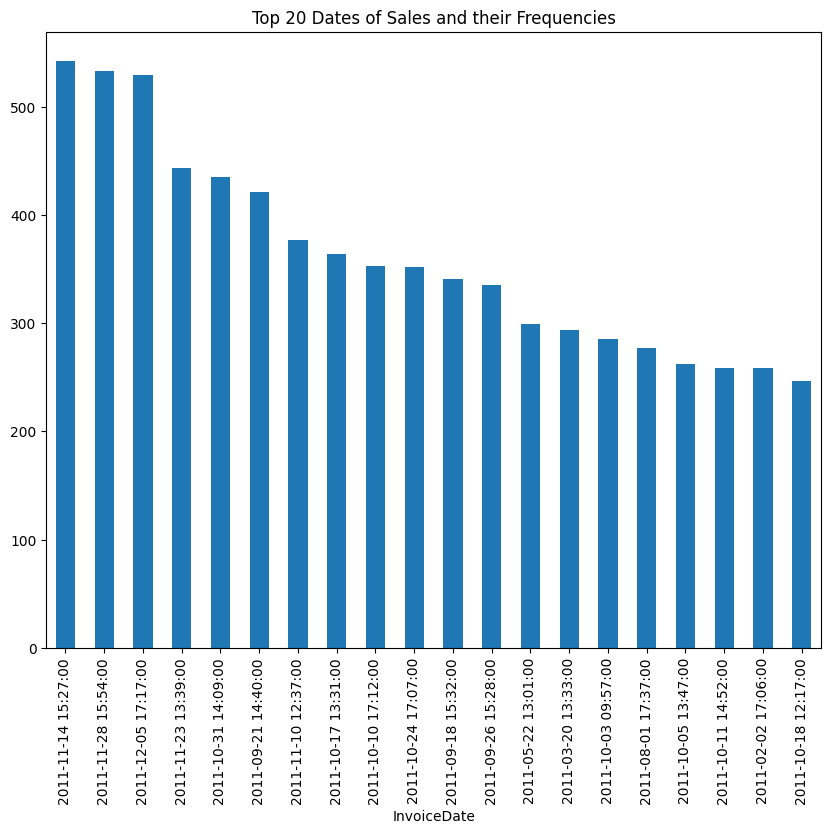

In [19]:
invoice_date = good_sales['InvoiceDate'].value_counts()[:20]
invoice_date.plot(kind='bar', figsize = (10,8))
plt.title('Top 20 Dates of Sales and their Frequencies')

Text(0.5, 1.0, 'Top 20 Unit Prices of Products and their Frequencies')

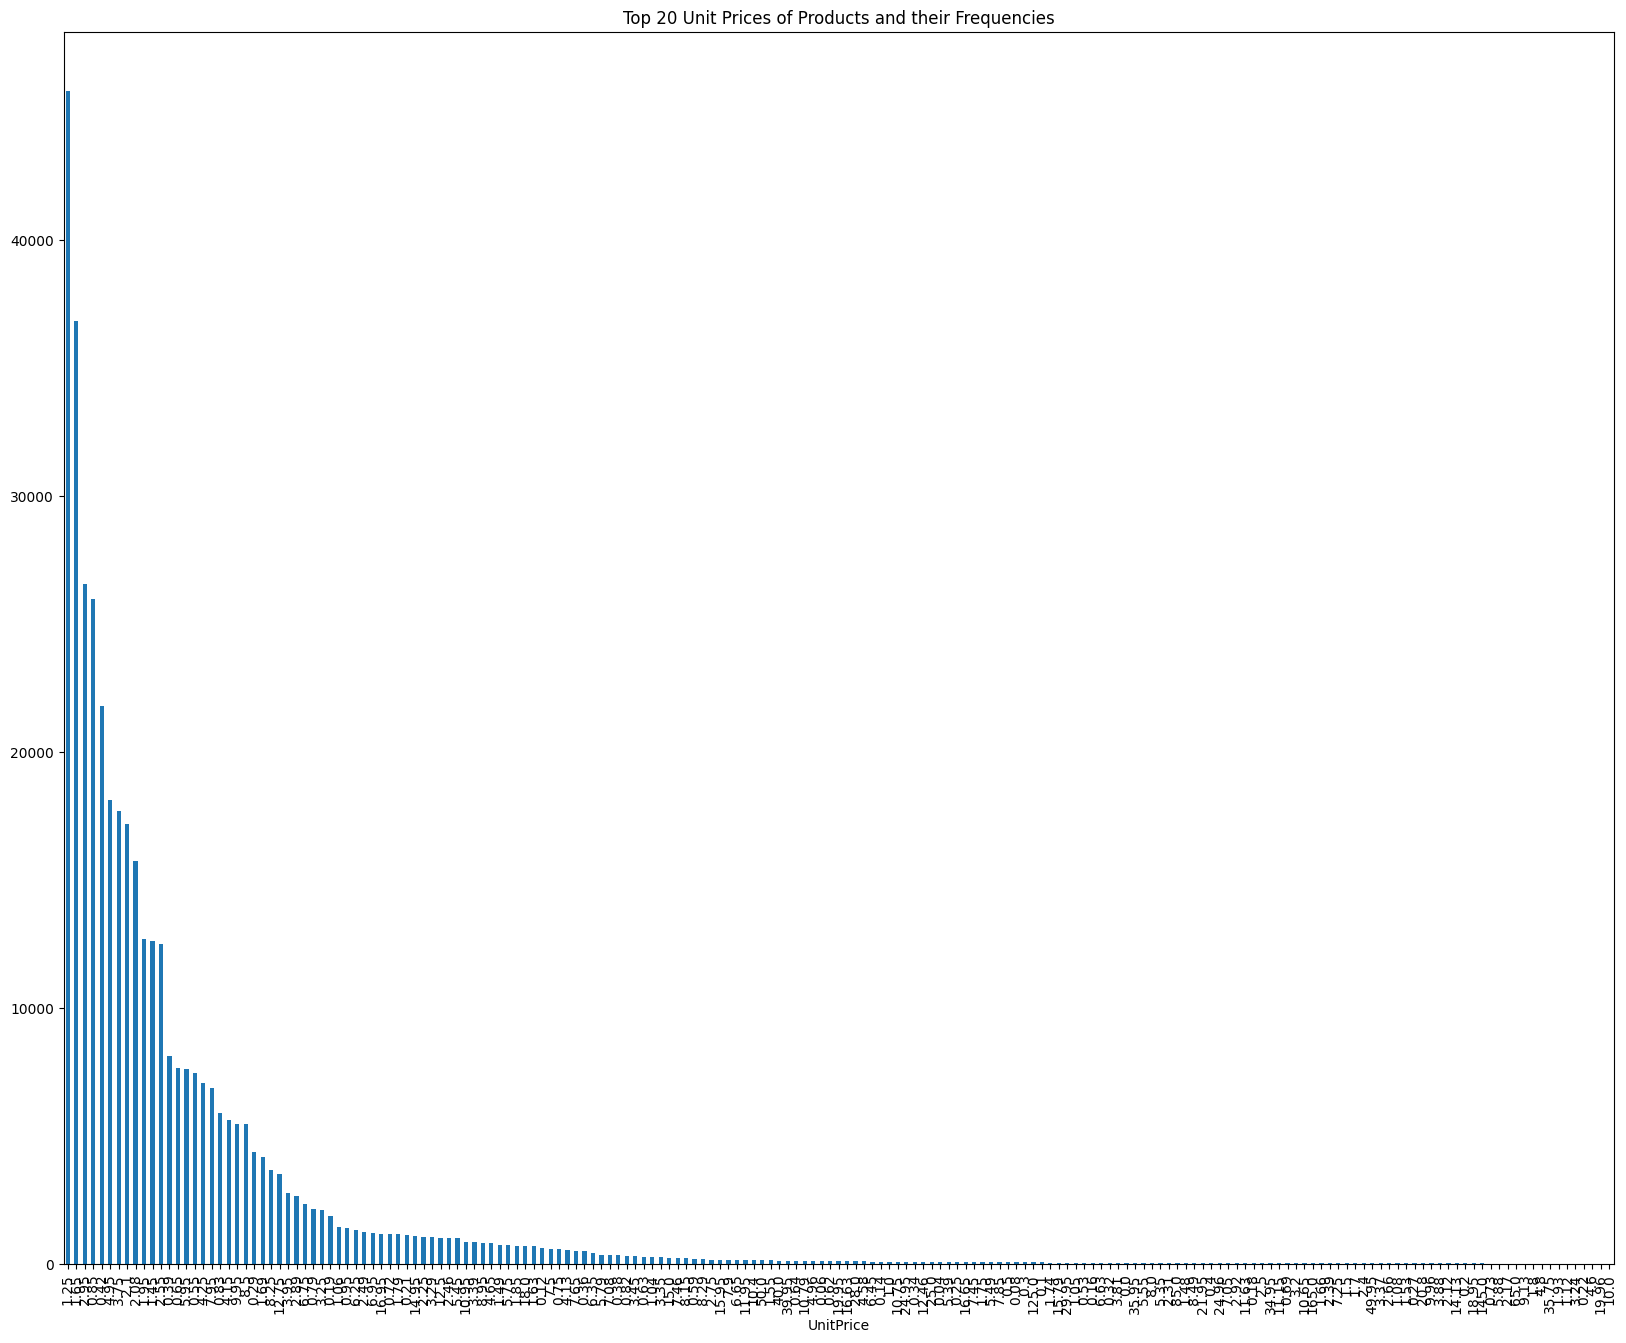

In [20]:
unit_price = good_sales['UnitPrice'].value_counts()[:10]
unit_price.plot(kind='bar', figsize = (20,16))
plt.title('Top 20 Unit Prices of Products and their Frequencies')

Text(0.5, 1.0, 'Top 20 Customers and their Frequencies')

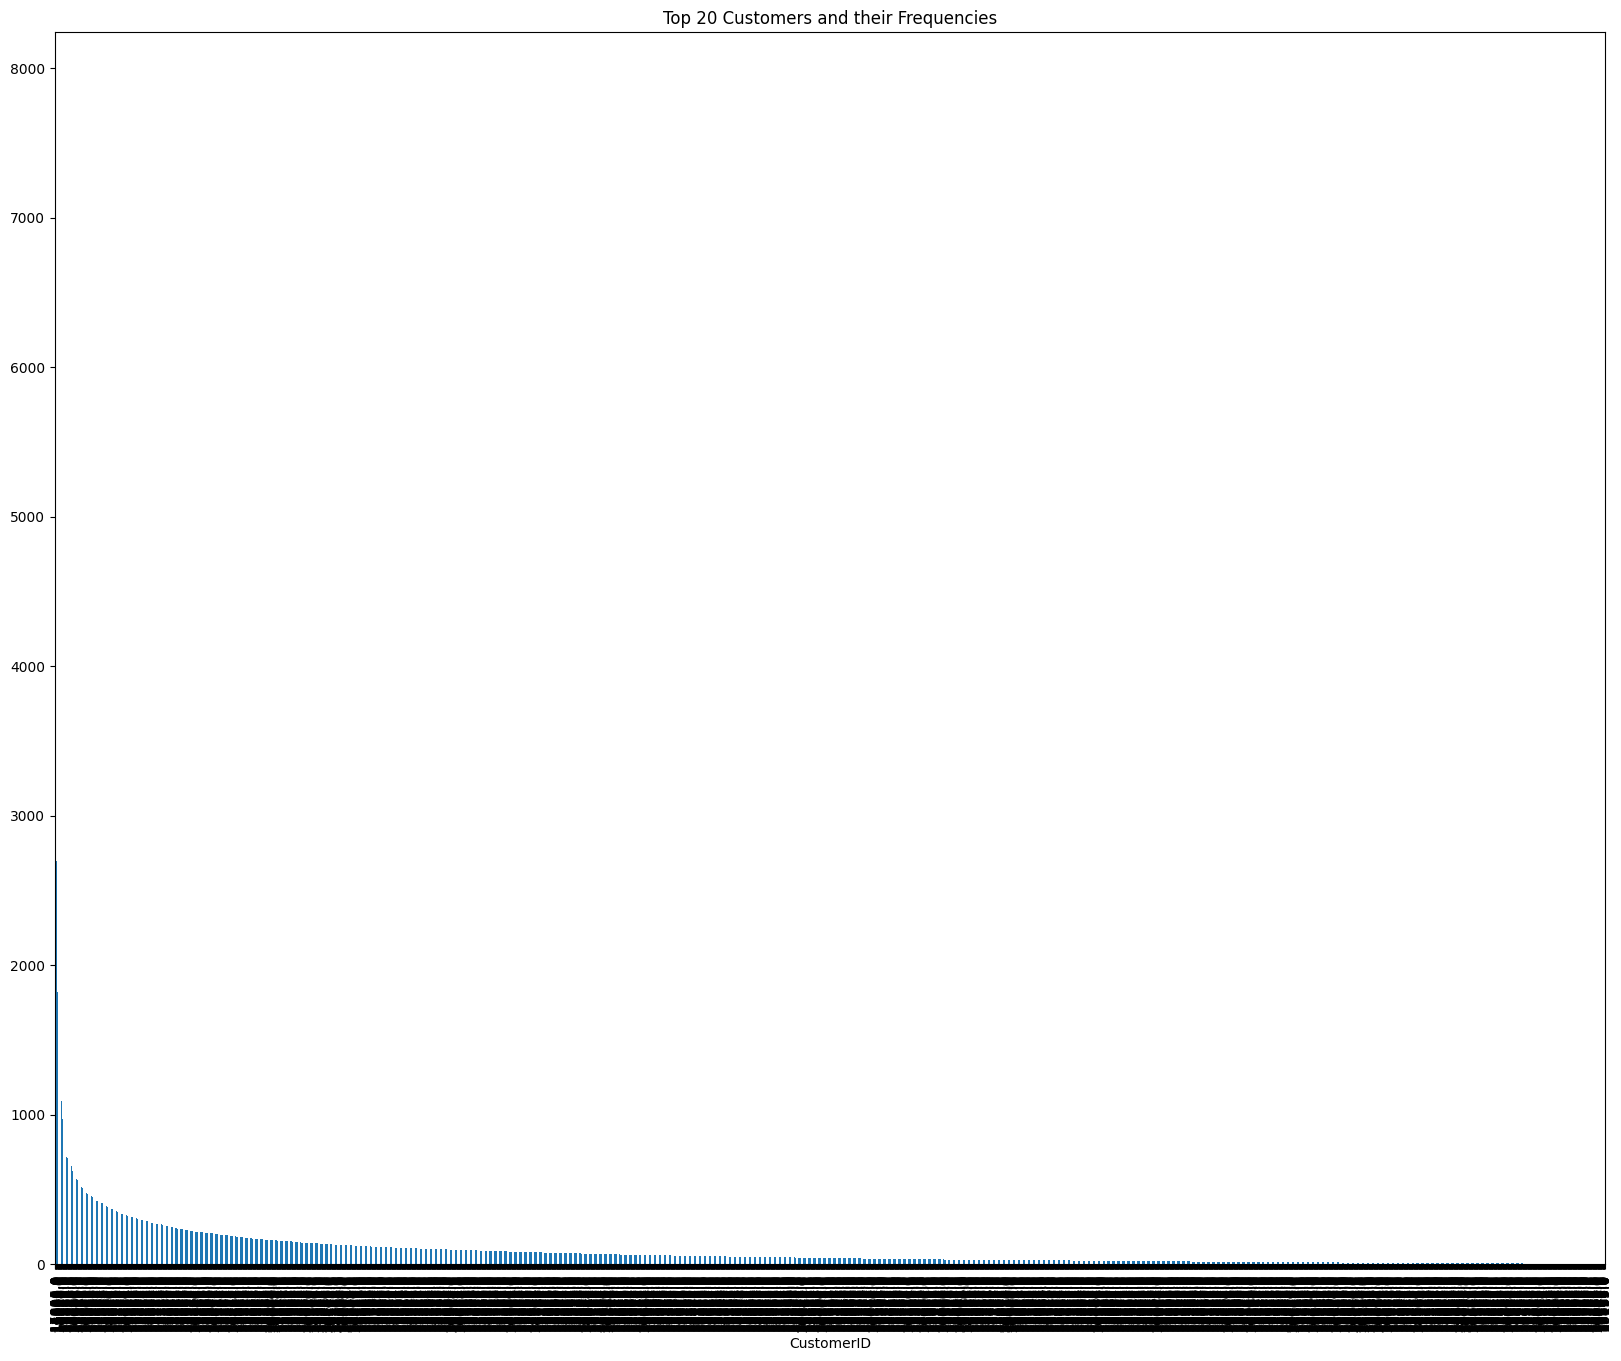

In [21]:
customer_id = good_sales['CustomerID'].value_counts()
customer_id.plot(kind='bar', figsize = (20,16))
plt.title('Top 20 Customers and their Frequencies')

Text(0.5, 1.0, 'Top 20 Transactions By Number of Product Lines Bought')

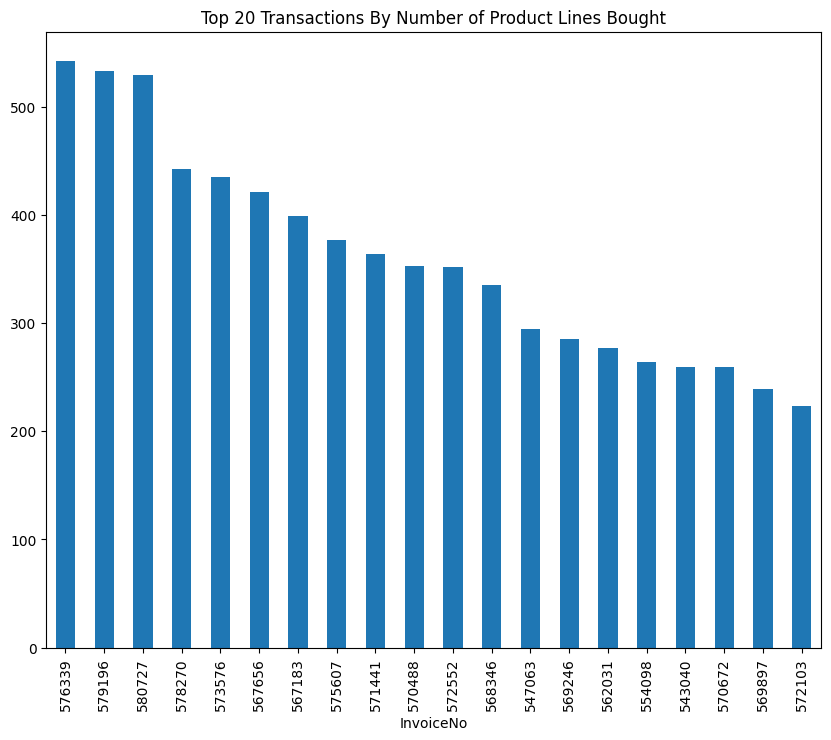

In [22]:
invoice_no = good_sales['InvoiceNo'].value_counts()[:20]
invoice_no.plot(kind='bar', figsize = (10,8))
plt.title('Top 20 Transactions By Number of Product Lines Bought')

Text(0.5, 1.0, 'Top 20 Products Bought By Transaction Frequency')

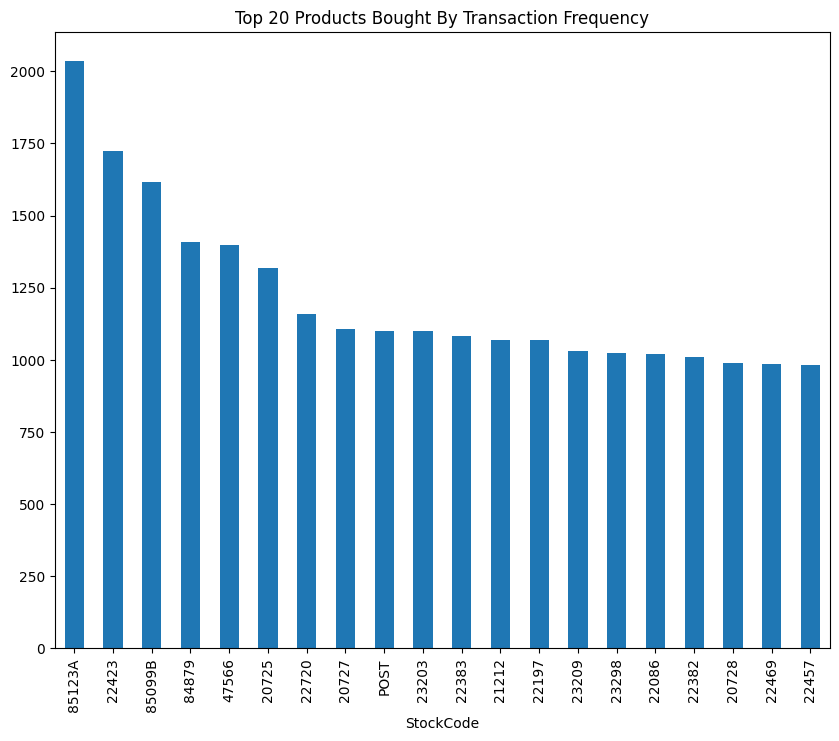

In [23]:
stock_code = good_sales['StockCode'].value_counts()[:20]
stock_code.plot(kind='bar', figsize = (10,8))
plt.title('Top 20 Products Bought By Transaction Frequency')

Text(0.5, 1.0, 'Top 20 Products Bought By Transaction Frequency')

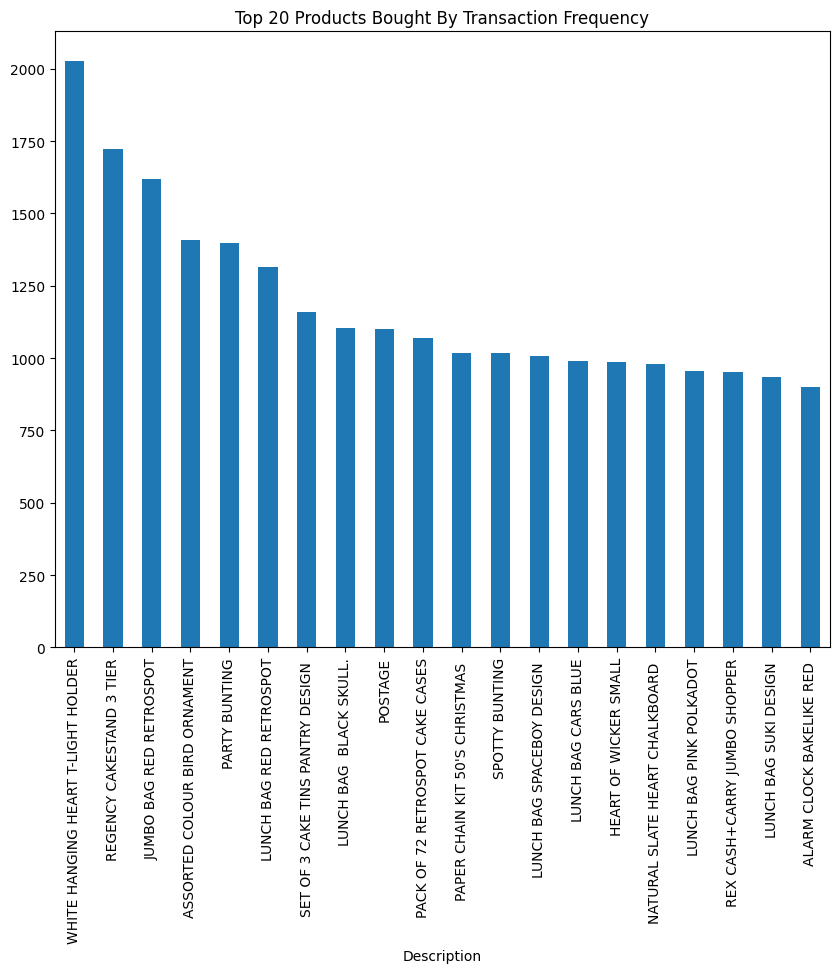

In [24]:
description = good_sales['Description'].value_counts()[:20]
description.plot(kind='bar', figsize = (10,8))
plt.title('Top 20 Products Bought By Transaction Frequency')

Text(0.5, 1.0, 'Top Countries Bought By Transaction Frequency')

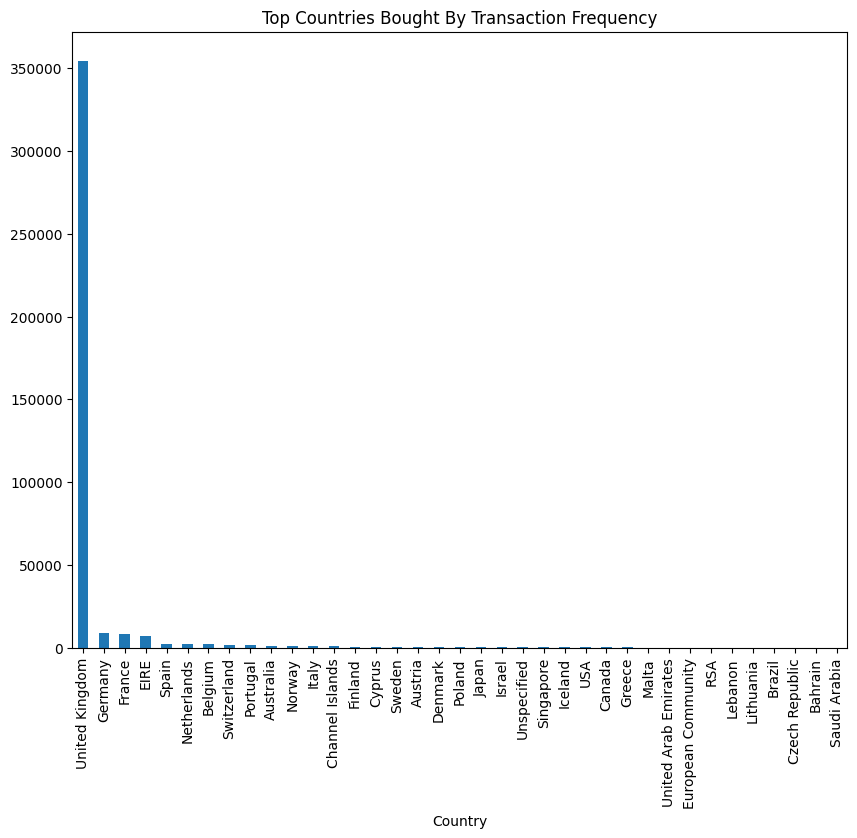

In [25]:
country = good_sales['Country'].value_counts()
country.plot(kind='bar', figsize = (10,8))
plt.title('Top Countries Bought By Transaction Frequency')

In [26]:
# Check unique values in each categorical column
for column in good_sales.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:", good_sales[column].unique())

Unique values in InvoiceNo: [536365 536366 536367 ... 581585 581586 581587]
Unique values in StockCode: ['85123A' 71053 '84406B' ... '90214Z' 90089 23843]
Unique values in Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Unique values in Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [27]:
# Get the count of each category in categorical columns
for column in good_sales.select_dtypes(include='object').columns:
    print(f"Value counts for {column}:\n", good_sales[column].value_counts(), "\n")

Value counts for InvoiceNo:
 InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
561657      1
546775      1
546827      1
546828      1
565975      1
Name: count, Length: 18536, dtype: int64 

Value counts for StockCode:
 StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: count, Length: 3665, dtype: int64 

Value counts for Description:
 Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Na

In [28]:
# Get the count of each value in the columns
for column in good_sales.columns:
    print(f"Value counts for {column}:\n", good_sales[column].value_counts(), "\n")

Value counts for InvoiceNo:
 InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
561657      1
546775      1
546827      1
546828      1
565975      1
Name: count, Length: 18536, dtype: int64 

Value counts for StockCode:
 StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: count, Length: 3665, dtype: int64 

Value counts for Description:
 Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Na

In [29]:
good_sales

InvoiceNo StockCode                          Description  Quantity   
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[397924 rows x 8 columns]

In [30]:
good_sales = good_sales.copy()
good_sales['TotalPaid'] = good_sales.loc[:, 'Quantity'] * good_sales.loc[:, 'UnitPrice']
good_sales

InvoiceNo StockCode                          Description  Quantity   
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPaid  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom      15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom      22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
...                    ...        ...         ...             ...        ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France      10.20  
541905 2011-12-09 12:50:00       2.10     12680.0          France      12.60  
541906 2011-12-09 12:50:00       4.15     12680.0          France      16.60  
541907 2011-12-09 12:50:00       4.15     12680.0          France      16.60  
541908 2011-12-09 12:50:00       4.95     12680.0          France      14.85  

[397924 rows x 9 columns]

In [31]:
function_dictionary = {'InvoiceDate': ['max', 'count'], 'TotalPaid': 'sum'}
customer_grouped = good_sales.groupby("CustomerID").aggregate(function_dictionary).reset_index()
customer_grouped

CustomerID         InvoiceDate       TotalPaid
                                max count       sum
0       12346.0 2011-01-18 10:01:00     1  77183.60
1       12347.0 2011-12-07 15:52:00   182   4310.00
2       12348.0 2011-09-25 13:13:00    31   1797.24
3       12349.0 2011-11-21 09:51:00    73   1757.55
4       12350.0 2011-02-02 16:01:00    17    334.40
...         ...                 ...   ...       ...
4334    18280.0 2011-03-07 09:52:00    10    180.60
4335    18281.0 2011-06-12 10:53:00     7     80.82
4336    18282.0 2011-12-02 11:43:00    12    178.05
4337    18283.0 2011-12-06 12:02:00   756   2094.88
4338    18287.0 2011-10-28 09:29:00    70   1837.28

[4339 rows x 4 columns]

In [32]:
customer_grouped.columns = customer_grouped.columns.map('|'.join).str.strip('|')
customer_grouped

CustomerID     InvoiceDate|max  InvoiceDate|count  TotalPaid|sum
0        12346.0 2011-01-18 10:01:00                  1       77183.60
1        12347.0 2011-12-07 15:52:00                182        4310.00
2        12348.0 2011-09-25 13:13:00                 31        1797.24
3        12349.0 2011-11-21 09:51:00                 73        1757.55
4        12350.0 2011-02-02 16:01:00                 17         334.40
...          ...                 ...                ...            ...
4334     18280.0 2011-03-07 09:52:00                 10         180.60
4335     18281.0 2011-06-12 10:53:00                  7          80.82
4336     18282.0 2011-12-02 11:43:00                 12         178.05
4337     18283.0 2011-12-06 12:02:00                756        2094.88
4338     18287.0 2011-10-28 09:29:00                 70        1837.28

[4339 rows x 4 columns]

In [33]:
customer_grouped.columns

Index(['CustomerID', 'InvoiceDate|max', 'InvoiceDate|count', 'TotalPaid|sum'], dtype='object')

In [34]:
customer_grouped['ReferenceDate'] = '2011-12-31'
customer_grouped

CustomerID     InvoiceDate|max  InvoiceDate|count  TotalPaid|sum   
0        12346.0 2011-01-18 10:01:00                  1       77183.60  \
1        12347.0 2011-12-07 15:52:00                182        4310.00   
2        12348.0 2011-09-25 13:13:00                 31        1797.24   
3        12349.0 2011-11-21 09:51:00                 73        1757.55   
4        12350.0 2011-02-02 16:01:00                 17         334.40   
...          ...                 ...                ...            ...   
4334     18280.0 2011-03-07 09:52:00                 10         180.60   
4335     18281.0 2011-06-12 10:53:00                  7          80.82   
4336     18282.0 2011-12-02 11:43:00                 12         178.05   
4337     18283.0 2011-12-06 12:02:00                756        2094.88   
4338     18287.0 2011-10-28 09:29:00                 70        1837.28   

     ReferenceDate  
0       2011-12-31  
1       2011-12-31  
2       2011-12-31  
3       2011-12-31  
4       2011-12-31  
...            ...  
4334    2011-12-31  
4335    2011-12-31  
4336    2011-12-31  
4337    2011-12-31  
4338    2011-12-31  

[4339 rows x 5 columns]

In [35]:
# Display the data types of each column
print("Data types:\n", customer_grouped.dtypes)

Data types:
 CustomerID                  float64
InvoiceDate|max      datetime64[ns]
InvoiceDate|count             int64
TotalPaid|sum               float64
ReferenceDate                object
dtype: object


In [36]:
customer_grouped['ReferenceDate'] = pd.to_datetime(customer_grouped['ReferenceDate'])
customer_grouped

CustomerID     InvoiceDate|max  InvoiceDate|count  TotalPaid|sum   
0        12346.0 2011-01-18 10:01:00                  1       77183.60  \
1        12347.0 2011-12-07 15:52:00                182        4310.00   
2        12348.0 2011-09-25 13:13:00                 31        1797.24   
3        12349.0 2011-11-21 09:51:00                 73        1757.55   
4        12350.0 2011-02-02 16:01:00                 17         334.40   
...          ...                 ...                ...            ...   
4334     18280.0 2011-03-07 09:52:00                 10         180.60   
4335     18281.0 2011-06-12 10:53:00                  7          80.82   
4336     18282.0 2011-12-02 11:43:00                 12         178.05   
4337     18283.0 2011-12-06 12:02:00                756        2094.88   
4338     18287.0 2011-10-28 09:29:00                 70        1837.28   

     ReferenceDate  
0       2011-12-31  
1       2011-12-31  
2       2011-12-31  
3       2011-12-31  
4       2011-12-31  
...            ...  
4334    2011-12-31  
4335    2011-12-31  
4336    2011-12-31  
4337    2011-12-31  
4338    2011-12-31  

[4339 rows x 5 columns]

In [37]:
customer_grouped['Recency'] = (customer_grouped['ReferenceDate'] - customer_grouped['InvoiceDate|max']).round('d')
customer_grouped = customer_grouped.rename(columns={"InvoiceDate|count": "Frequency", "TotalPaid|sum": "Monetary"})
customer_grouped = customer_grouped.loc[:, ["CustomerID", "InvoiceDate|max", "ReferenceDate", "Recency", "Frequency", "Monetary"]]
customer_grouped

CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0        12346.0 2011-01-18 10:01:00    2011-12-31 347 days          1  \
1        12347.0 2011-12-07 15:52:00    2011-12-31  23 days        182   
2        12348.0 2011-09-25 13:13:00    2011-12-31  96 days         31   
3        12349.0 2011-11-21 09:51:00    2011-12-31  40 days         73   
4        12350.0 2011-02-02 16:01:00    2011-12-31 331 days         17   
...          ...                 ...           ...      ...        ...   
4334     18280.0 2011-03-07 09:52:00    2011-12-31 299 days         10   
4335     18281.0 2011-06-12 10:53:00    2011-12-31 202 days          7   
4336     18282.0 2011-12-02 11:43:00    2011-12-31  29 days         12   
4337     18283.0 2011-12-06 12:02:00    2011-12-31  24 days        756   
4338     18287.0 2011-10-28 09:29:00    2011-12-31  64 days         70   

      Monetary  
0     77183.60  
1      4310.00  
2      1797.24  
3      1757.55  
4       334.40  
...        ...  
4334    180.60  
4335     80.82  
4336    178.05  
4337   2094.88  
4338   1837.28  

[4339 rows x 6 columns]

In [38]:
# Get the count of each value in the columns
for column in customer_grouped.columns:
    print(f"Value counts for {column}:\n", customer_grouped[column].value_counts(), "\n")

Value counts for CustomerID:
 CustomerID
12346.0    1
16298.0    1
16274.0    1
16275.0    1
16276.0    1
          ..
14323.0    1
14326.0    1
14327.0    1
14329.0    1
18287.0    1
Name: count, Length: 4339, dtype: int64 

Value counts for InvoiceDate|max:
 InvoiceDate|max
2011-12-01 15:12:00    3
2011-11-02 12:04:00    3
2011-10-20 14:33:00    3
2011-12-01 13:47:00    3
2011-10-17 10:10:00    2
                      ..
2011-11-23 10:01:00    1
2011-11-23 13:41:00    1
2011-11-23 11:40:00    1
2011-07-01 14:08:00    1
2011-10-28 09:29:00    1
Name: count, Length: 4200, dtype: int64 

Value counts for ReferenceDate:
 ReferenceDate
2011-12-31    4339
Name: count, dtype: int64 

Value counts for Recency:
 Recency
25 days     105
22 days     100
24 days      93
23 days      87
30 days      72
           ... 
237 days      1
244 days      1
203 days      1
230 days      1
350 days      1
Name: count, Length: 345, dtype: int64 

Value counts for Frequency:
 Frequency
10      78
11      74

In [39]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", customer_grouped.describe())

Summary Statistics:
          CustomerID                InvoiceDate|max        ReferenceDate   
count   4339.000000                           4339                 4339  \
mean   15299.936852  2011-09-08 12:04:55.782438400  2011-12-31 00:00:00   
min    12346.000000            2010-12-01 09:53:00  2011-12-31 00:00:00   
25%    13812.500000            2011-07-21 00:20:00  2011-12-31 00:00:00   
50%    15299.000000            2011-10-20 10:47:00  2011-12-31 00:00:00   
75%    16778.500000            2011-11-22 11:10:30  2011-12-31 00:00:00   
max    18287.000000            2011-12-09 12:50:00  2011-12-31 00:00:00   
std     1721.889758                            NaN                  NaN   

                           Recency    Frequency       Monetary  
count                         4339  4339.000000    4339.000000  
mean   113 days 09:02:56.722747176    91.708689    2053.793018  
min               21 days 00:00:00     1.000000       0.000000  
25%               39 days 00:00:00    17.00

In [40]:
customer_grouped['RecencyRank'] = 9 - pd.qcut(customer_grouped['Recency'], 10, labels = False)
customer_grouped['FrequencyRank'] = pd.qcut(customer_grouped['Frequency'], 10, labels = False)
customer_grouped['MonetaryRank'] = pd.qcut(customer_grouped['Monetary'], 10, labels = False)
customer_grouped

CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0        12346.0 2011-01-18 10:01:00    2011-12-31 347 days          1  \
1        12347.0 2011-12-07 15:52:00    2011-12-31  23 days        182   
2        12348.0 2011-09-25 13:13:00    2011-12-31  96 days         31   
3        12349.0 2011-11-21 09:51:00    2011-12-31  40 days         73   
4        12350.0 2011-02-02 16:01:00    2011-12-31 331 days         17   
...          ...                 ...           ...      ...        ...   
4334     18280.0 2011-03-07 09:52:00    2011-12-31 299 days         10   
4335     18281.0 2011-06-12 10:53:00    2011-12-31 202 days          7   
4336     18282.0 2011-12-02 11:43:00    2011-12-31  29 days         12   
4337     18283.0 2011-12-06 12:02:00    2011-12-31  24 days        756   
4338     18287.0 2011-10-28 09:29:00    2011-12-31  64 days         70   

      Monetary  RecencyRank  FrequencyRank  MonetaryRank  
0     77183.60            0              0             9  
1      4310.00            9              8             9  
2      1797.24            3              4             7  
3      1757.55            7              6             7  
4       334.40            0              2             2  
...        ...          ...            ...           ...  
4334    180.60            0              1             1  
4335     80.82            1              0             0  
4336    178.05            8              1             1  
4337   2094.88            9              9             8  
4338   1837.28            5              6             7  

[4339 rows x 9 columns]

Text(0.5, 1.0, 'Distribution of the Recency Scores')

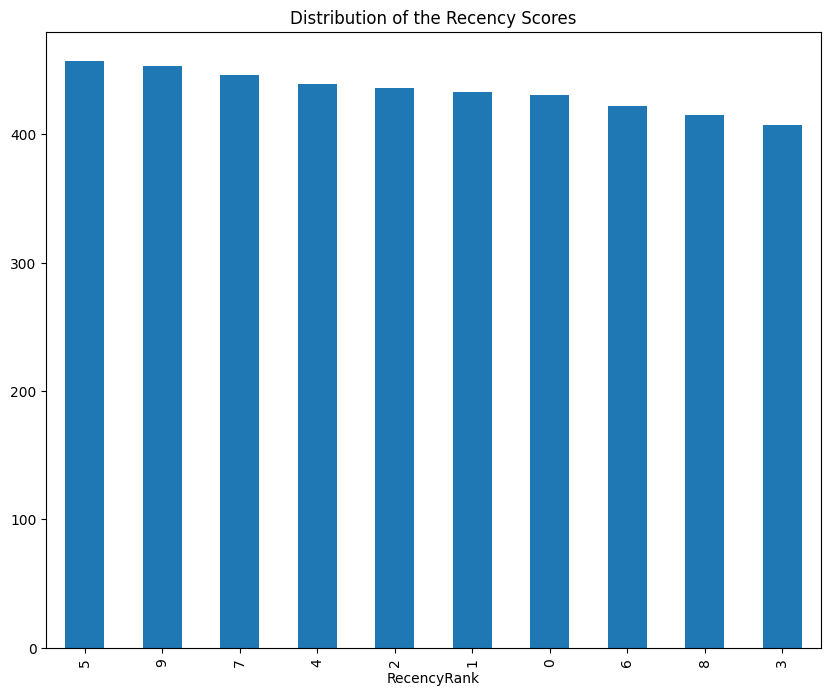

In [41]:
#Plot the histograms
recency_score = customer_grouped['RecencyRank'].value_counts()
recency_score.plot(kind='bar', figsize = (10,8))
plt.title('Distribution of the Recency Scores')

Text(0.5, 1.0, 'Distribution of the Frequency Scores')

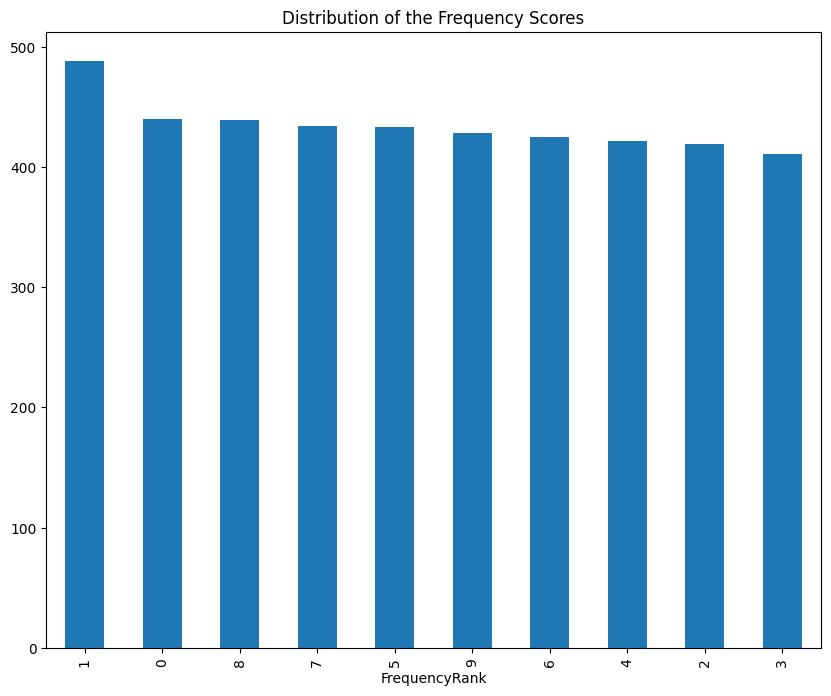

In [42]:
#Plot the histograms
frequency_score = customer_grouped['FrequencyRank'].value_counts()
frequency_score.plot(kind='bar', figsize = (10,8))
plt.title('Distribution of the Frequency Scores')

Text(0.5, 1.0, 'Distribution of the Monetary Scores')

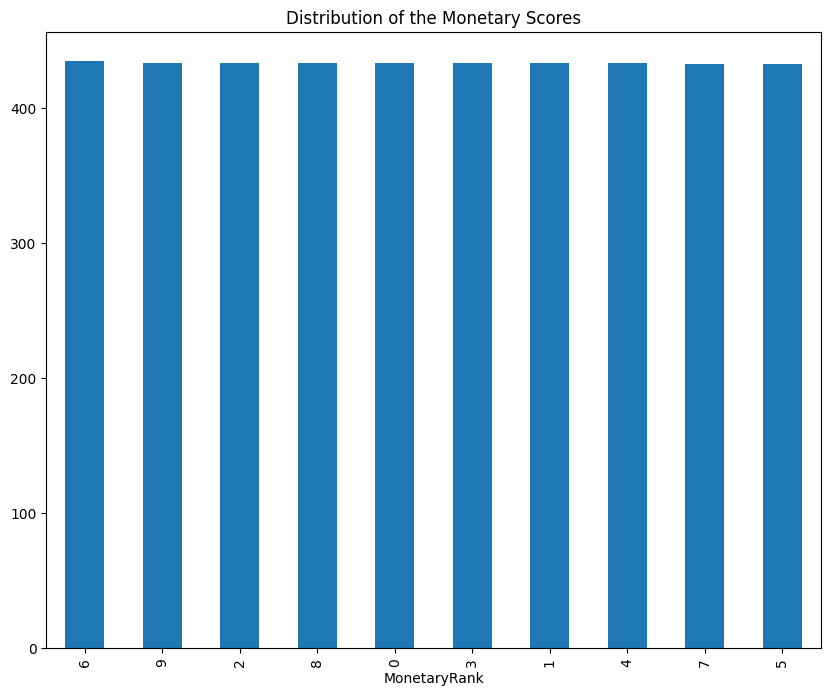

In [43]:
#Plot the histograms
monetary_score = customer_grouped['MonetaryRank'].value_counts()
monetary_score.plot(kind='bar', figsize = (10,8))
plt.title('Distribution of the Monetary Scores')

In [44]:
customer_grouped5 = customer_grouped.copy()

In [45]:
customer_grouped5['RecencyRank'] = 4 - pd.qcut(customer_grouped['Recency'], 5, labels = False)
customer_grouped5['FrequencyRank'] = pd.qcut(customer_grouped['Frequency'], 5, labels = False)
customer_grouped5['MonetaryRank'] = pd.qcut(customer_grouped['Monetary'], 5, labels = False)
customer_grouped5

CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0        12346.0 2011-01-18 10:01:00    2011-12-31 347 days          1  \
1        12347.0 2011-12-07 15:52:00    2011-12-31  23 days        182   
2        12348.0 2011-09-25 13:13:00    2011-12-31  96 days         31   
3        12349.0 2011-11-21 09:51:00    2011-12-31  40 days         73   
4        12350.0 2011-02-02 16:01:00    2011-12-31 331 days         17   
...          ...                 ...           ...      ...        ...   
4334     18280.0 2011-03-07 09:52:00    2011-12-31 299 days         10   
4335     18281.0 2011-06-12 10:53:00    2011-12-31 202 days          7   
4336     18282.0 2011-12-02 11:43:00    2011-12-31  29 days         12   
4337     18283.0 2011-12-06 12:02:00    2011-12-31  24 days        756   
4338     18287.0 2011-10-28 09:29:00    2011-12-31  64 days         70   

      Monetary  RecencyRank  FrequencyRank  MonetaryRank  
0     77183.60            0              0             4  
1      4310.00            4              4             4  
2      1797.24            1              2             3  
3      1757.55            3              3             3  
4       334.40            0              1             1  
...        ...          ...            ...           ...  
4334    180.60            0              0             0  
4335     80.82            0              0             0  
4336    178.05            4              0             0  
4337   2094.88            4              4             4  
4338   1837.28            2              3             3  

[4339 rows x 9 columns]

Text(0.5, 1.0, 'Distribution of the Monetary Scores')

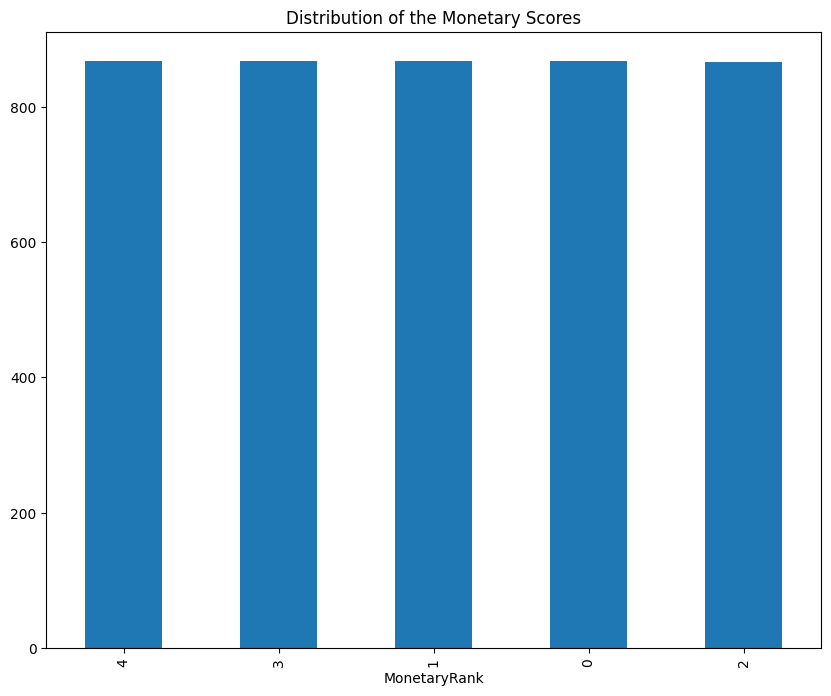

In [46]:
#Plot the histograms
monetary_score = customer_grouped5['MonetaryRank'].value_counts()
monetary_score.plot(kind='bar', figsize = (10,8))
plt.title('Distribution of the Monetary Scores')

In [47]:
# Calculate quantiles for Recency, Frequency, and Monetary
recency_quantiles = customer_grouped5['Recency'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
frequency_quantiles = customer_grouped5['Frequency'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
monetary_quantiles = customer_grouped5['Monetary'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

# Assign ranks based on quantiles
customer_grouped5['RecencyRank'] = pd.cut(customer_grouped['Recency'], bins=recency_quantiles, labels=False, include_lowest=True)
customer_grouped5['FrequencyRank'] = pd.cut(customer_grouped['Frequency'], bins=frequency_quantiles, labels=False, include_lowest=True)
customer_grouped5['MonetaryRank'] = pd.cut(customer_grouped['Monetary'], bins=monetary_quantiles, labels=False, include_lowest=True)


In [48]:
customer_grouped5

CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0        12346.0 2011-01-18 10:01:00    2011-12-31 347 days          1  \
1        12347.0 2011-12-07 15:52:00    2011-12-31  23 days        182   
2        12348.0 2011-09-25 13:13:00    2011-12-31  96 days         31   
3        12349.0 2011-11-21 09:51:00    2011-12-31  40 days         73   
4        12350.0 2011-02-02 16:01:00    2011-12-31 331 days         17   
...          ...                 ...           ...      ...        ...   
4334     18280.0 2011-03-07 09:52:00    2011-12-31 299 days         10   
4335     18281.0 2011-06-12 10:53:00    2011-12-31 202 days          7   
4336     18282.0 2011-12-02 11:43:00    2011-12-31  29 days         12   
4337     18283.0 2011-12-06 12:02:00    2011-12-31  24 days        756   
4338     18287.0 2011-10-28 09:29:00    2011-12-31  64 days         70   

      Monetary  RecencyRank  FrequencyRank  MonetaryRank  
0     77183.60            4              0             4  
1      4310.00            0              4             4  
2      1797.24            3              2             3  
3      1757.55            1              3             3  
4       334.40            4              1             1  
...        ...          ...            ...           ...  
4334    180.60            4              0             0  
4335     80.82            4              0             0  
4336    178.05            0              0             0  
4337   2094.88            0              4             4  
4338   1837.28            2              3             3  

[4339 rows x 9 columns]

Text(0.5, 1.0, 'Distribution of the Monetary Scores')

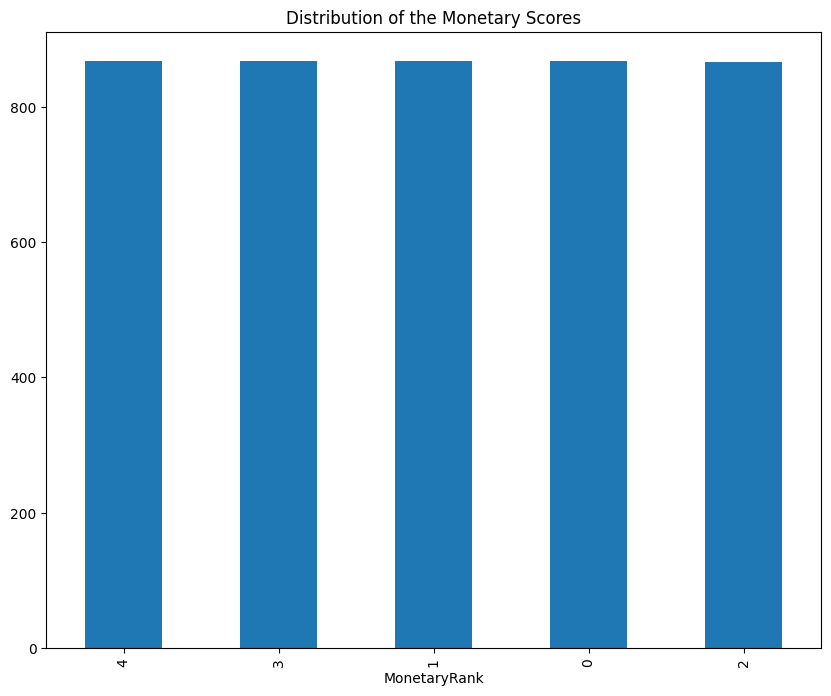

In [49]:
#Plot the histograms
monetary_score = customer_grouped5['MonetaryRank'].value_counts()
monetary_score.plot(kind='bar', figsize = (10,8))
plt.title('Distribution of the Monetary Scores')

Text(0.5, 1.0, 'Distribution of the Monetary Scores')

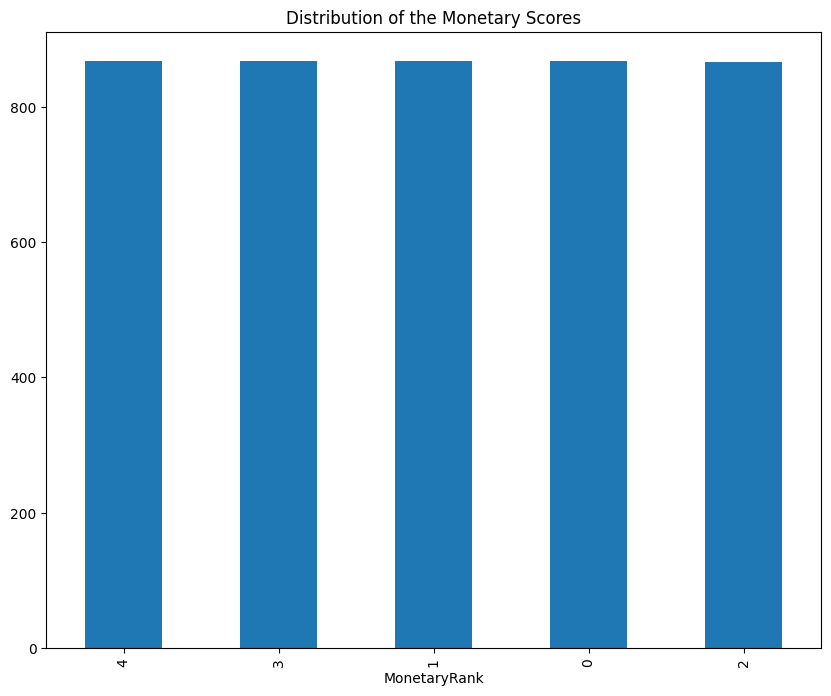

In [50]:
#Plot the histograms
monetary_score = customer_grouped5['MonetaryRank'].value_counts()
monetary_score.plot(kind='bar', figsize = (10,8))
plt.title('Distribution of the Monetary Scores')

In [51]:
customers_rank9 = customer_grouped[(customer_grouped['RecencyRank'] == 9) & (customer_grouped['FrequencyRank'] == 9) & (customer_grouped['MonetaryRank'])]
customers_rank9

CustomerID     InvoiceDate|max ReferenceDate Recency  Frequency   
15       12362.0 2011-12-06 15:40:00    2011-12-31 24 days        266  \
71       12433.0 2011-12-09 10:02:00    2011-12-31 22 days        420   
100      12471.0 2011-12-07 15:43:00    2011-12-31 23 days        460   
115      12490.0 2011-12-04 16:07:00    2011-12-31 26 days        245   
189      12583.0 2011-12-07 08:07:00    2011-12-31 24 days        247   
...          ...                 ...           ...     ...        ...   
4072     17920.0 2011-12-05 14:29:00    2011-12-31 25 days        696   
4202     18102.0 2011-12-09 11:50:00    2011-12-31 22 days        431   
4207     18109.0 2011-12-08 11:36:00    2011-12-31 23 days        444   
4292     18223.0 2011-12-05 09:11:00    2011-12-31 26 days        272   
4294     18225.0 2011-12-06 13:27:00    2011-12-31 24 days        271   

       Monetary  RecencyRank  FrequencyRank  MonetaryRank  
15      5226.23            9              9             9  
71     13375.87            9              9             9  
100    19824.05            9              9             9  
115     5417.93            9              9             9  
189     7281.38            9              9             9  
...         ...          ...            ...           ...  
4072    4204.10            9              9             9  
4202  259657.30            9              9             9  
4207    8052.97            9              9             9  
4292    6484.54            9              9             9  
4294    5509.12            9              9             9  

[118 rows x 9 columns]

In [52]:
# Display the data types of each column
print("Data types:\n", customer_grouped.dtypes)

Data types:
 CustomerID                 float64
InvoiceDate|max     datetime64[ns]
ReferenceDate       datetime64[ns]
Recency            timedelta64[ns]
Frequency                    int64
Monetary                   float64
RecencyRank                  int64
FrequencyRank                int64
MonetaryRank                 int64
dtype: object


In [53]:
customer_grouped['Recency'] = customer_grouped['Recency'].dt.days

In [54]:
fig = px.box(customer_grouped, y = 'Recency')
fig.show()

In [55]:
fig = px.box(customer_grouped, y = 'Frequency')
fig.show()

In [56]:
fig = px.box(customer_grouped, y = 'Monetary')
fig.show()

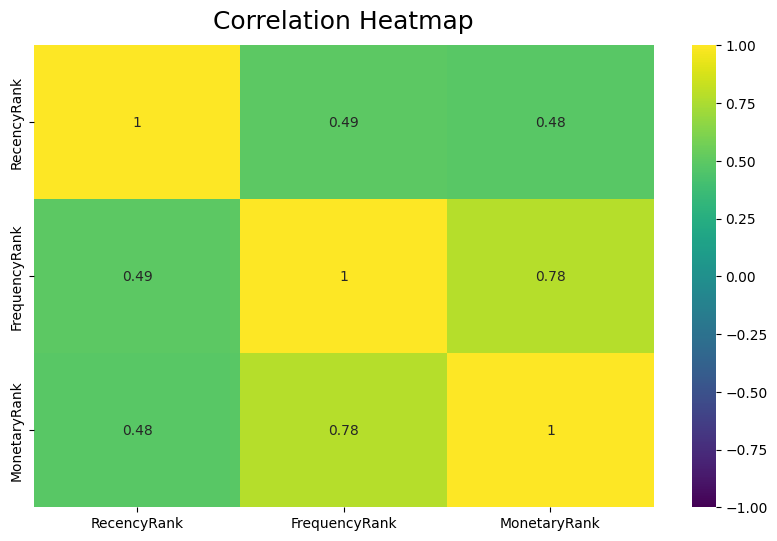

In [57]:
plt.figure(figsize = (10, 6))
heatmap = sns.heatmap(customer_grouped[['RecencyRank', 'FrequencyRank', 'MonetaryRank']].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [58]:
col_names = ['Recency', 'Frequency', 'Monetary']
sd = StandardScaler()
features = customer_grouped[col_names]
features.values

array([[3.47000e+02, 1.00000e+00, 7.71836e+04],
       [2.30000e+01, 1.82000e+02, 4.31000e+03],
       [9.60000e+01, 3.10000e+01, 1.79724e+03],
       ...,
       [2.90000e+01, 1.20000e+01, 1.78050e+02],
       [2.40000e+01, 7.56000e+02, 2.09488e+03],
       [6.40000e+01, 7.00000e+01, 1.83728e+03]])

In [59]:
scaler = sd.fit(features.values)
features = scaler.transform(features.values)
features

array([[ 2.33607662e+00, -3.96512139e-01,  8.35963391e+00],
       [-9.03711293e-01,  3.94687670e-01,  2.51046358e-01],
       [-1.73759079e-01, -2.65374049e-01, -2.85464504e-02],
       ...,
       [-8.43715221e-01, -3.48428173e-01, -2.08712435e-01],
       [-8.93711948e-01,  2.90379646e+00,  4.57171586e-03],
       [-4.93738132e-01, -9.48945321e-02, -2.40912314e-02]])

In [60]:
scaled_features = pd.DataFrame(features, columns = col_names)

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/clust

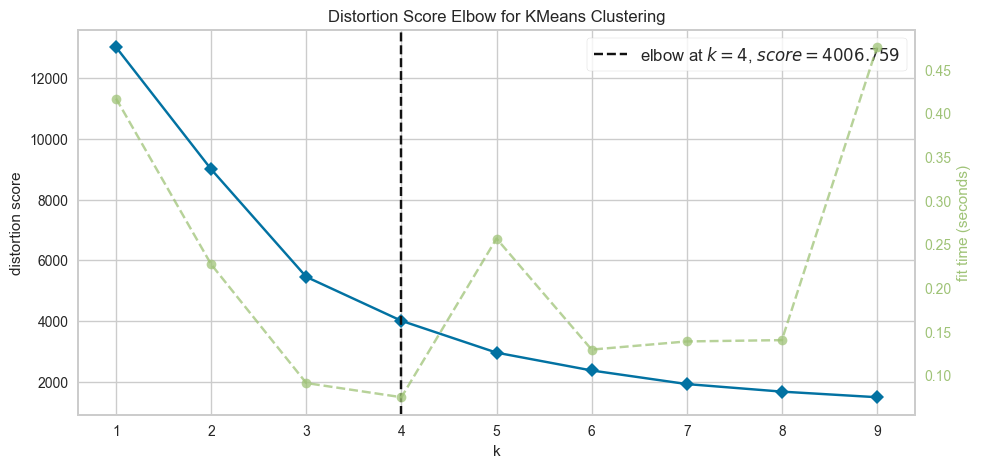

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,10), size=(1080, 500))
visualizer.fit(scaled_features)
visualizer.show()

In [62]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)
kmeans.fit(scaled_features)
print("silhouette_score is :", silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



silhouette_score is : 0.6008388548833847


/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



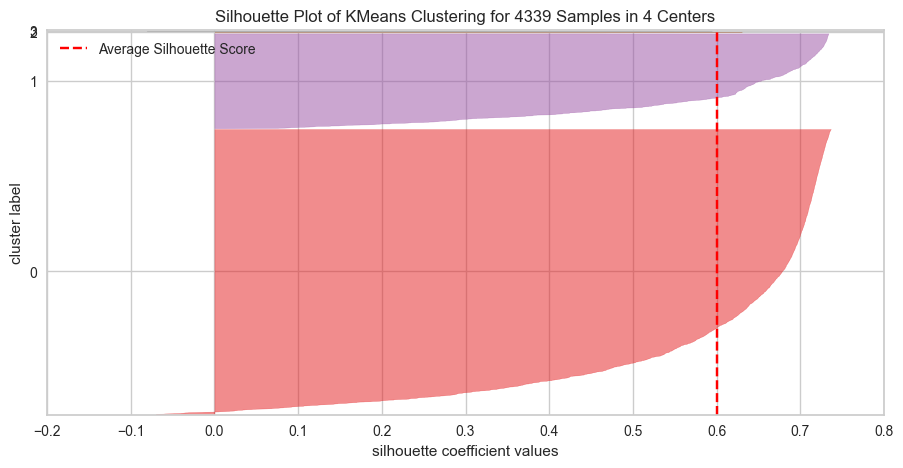

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4339 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
visualizer = SilhouetteVisualizer(kmeans1, size = (1080, 500))
visualizer.fit(scaled_features)
visualizer.show()

In [64]:
clusters = kmeans.fit_predict(customer_grouped.iloc[:, 3:6])
scaled_features["label"] = clusters
scaled_features.head()

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Recency  Frequency  Monetary  label
0  2.336077  -0.396512  8.359634      2
1 -0.903711   0.394688  0.251046      0
2 -0.173759  -0.265374 -0.028546      0
3 -0.733722  -0.081781 -0.032963      0
4  2.176087  -0.326572 -0.191315      0

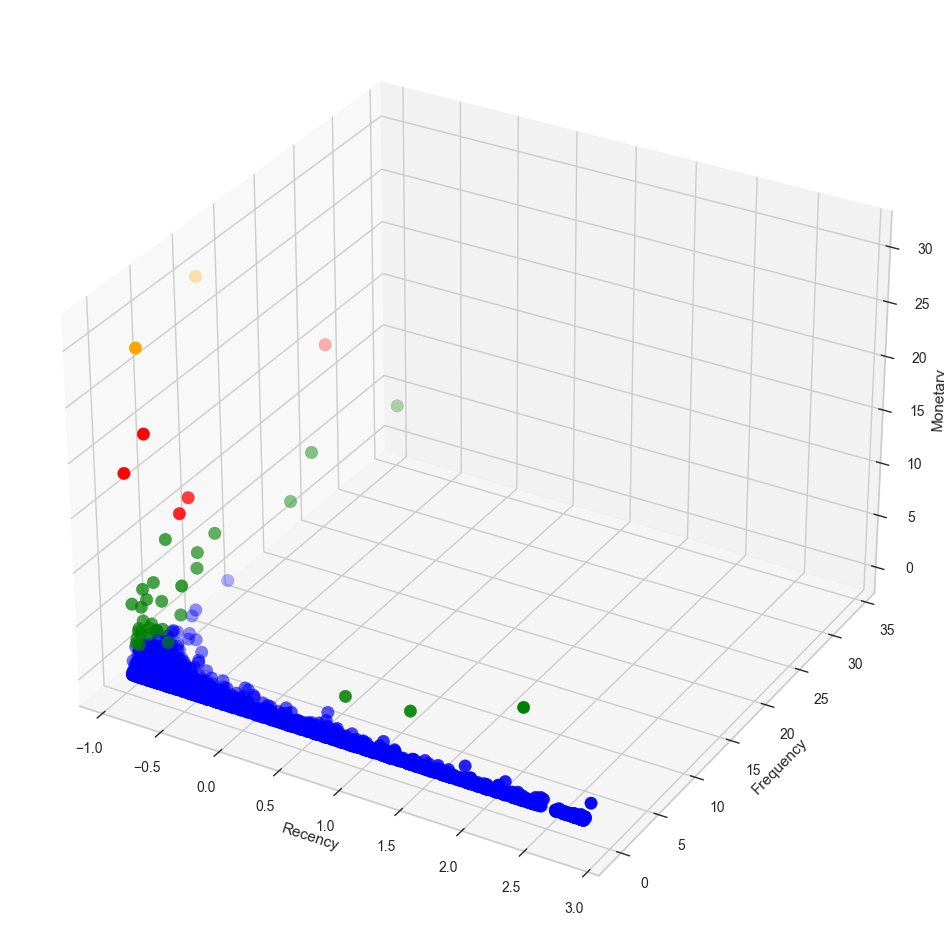

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(scaled_features.Recency[scaled_features['label'] == 0], scaled_features.Frequency[scaled_features['label'] == 0], scaled_features.Monetary[scaled_features['label'] == 0], c = 'blue', s = 80)
ax.scatter(scaled_features.Recency[scaled_features['label'] == 1], scaled_features.Frequency[scaled_features['label'] == 1], scaled_features.Monetary[scaled_features['label'] == 1], c = 'red', s = 80)
ax.scatter(scaled_features.Recency[scaled_features['label'] == 2], scaled_features.Frequency[scaled_features['label'] == 2], scaled_features.Monetary[scaled_features['label'] == 2], c = 'green', s = 80)
ax.scatter(scaled_features.Recency[scaled_features['label'] == 3], scaled_features.Frequency[scaled_features['label'] == 3], scaled_features.Monetary[scaled_features['label'] == 3], c = 'orange', s = 80)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

# Another model using PCA for feature selection

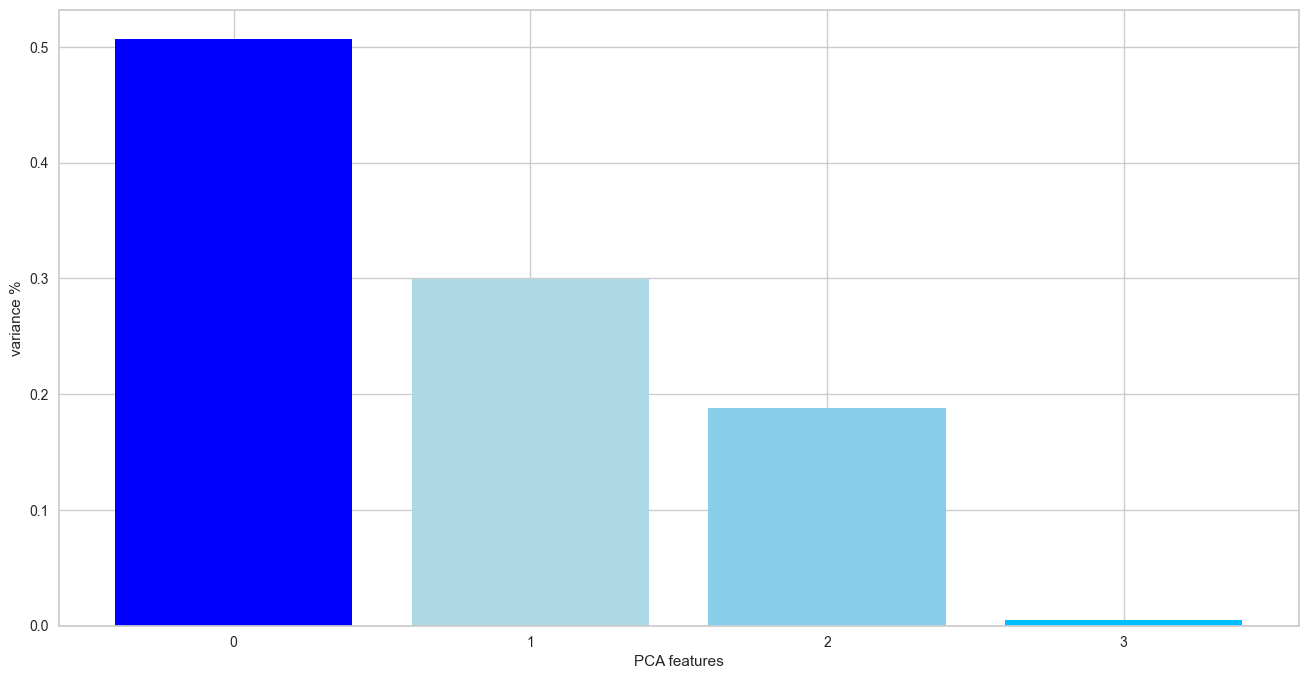

In [66]:
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(scaled_features)
features = range(pca.n_components_)
plt.figure(figsize = (16, 8))
blue_palette = ['blue', 'lightblue', 'skyblue', 'deepskyblue']
plt.bar(features, pca.explained_variance_ratio_, color=blue_palette[0:4])
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

The chart above shows that the first 2 PCA components explain more than 80% of the dataset variance. So we feed these 2 components into the model.

In [67]:
PCA_components

0         1         2         3
0     4.256407  5.482372 -5.514937 -0.918157
1     0.777308 -0.654792 -0.022333  0.048175
2    -0.125455 -0.210859 -0.203649  0.006328
3     0.215981 -0.689012 -0.158108  0.004754
4    -1.204464  1.835263  0.244836  0.004736
...        ...       ...       ...       ...
4334 -1.108004  1.534936  0.180916 -0.000707
4335 -0.737330  0.653271  0.018922 -0.010540
4336 -0.027055 -0.899921 -0.256839 -0.023364
4337  2.274057 -0.349027  1.983240  0.068276
4338  0.117332 -0.471010 -0.134052  0.007617

[4339 rows x 4 columns]

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/clust

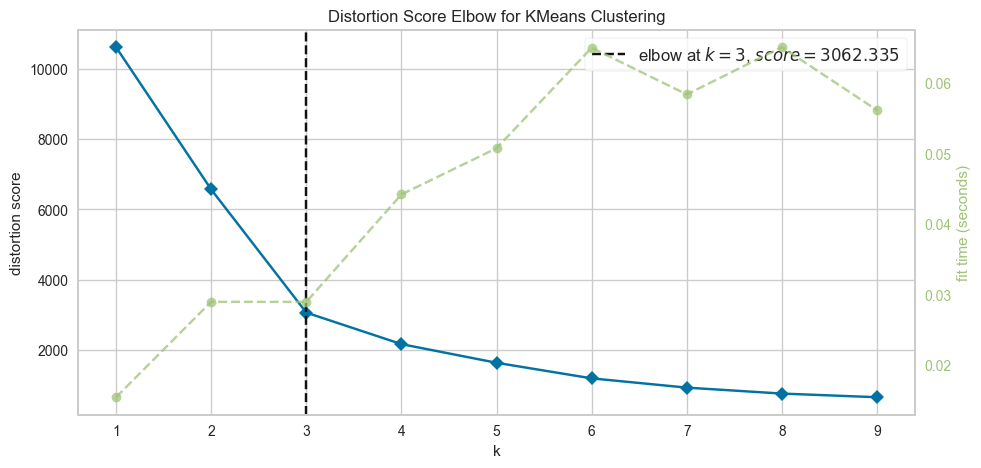

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10), size = (1080, 500))

visualizer.fit(PCA_components.iloc[:, :2])
visualizer.show()

In [69]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
model.fit(PCA_components.iloc[:, :2])
print("silhouette_score is :", silhouette_score(PCA_components.iloc[:, :2], model.labels_, metric = 'euclidean'))

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



silhouette_score is : 0.6279635303575368


/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



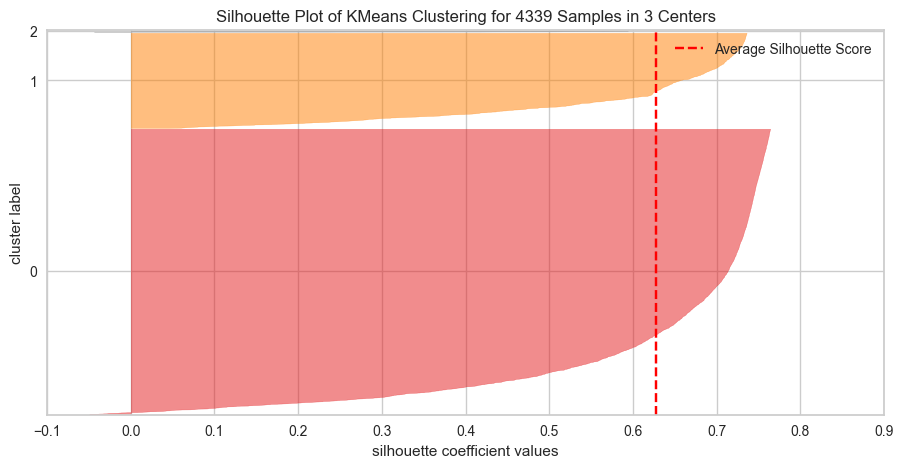

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4339 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [70]:
model1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
visualizer = SilhouetteVisualizer(model1, size = (1080, 500))
visualizer.fit(PCA_components.iloc[:, :2])
visualizer.show()

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



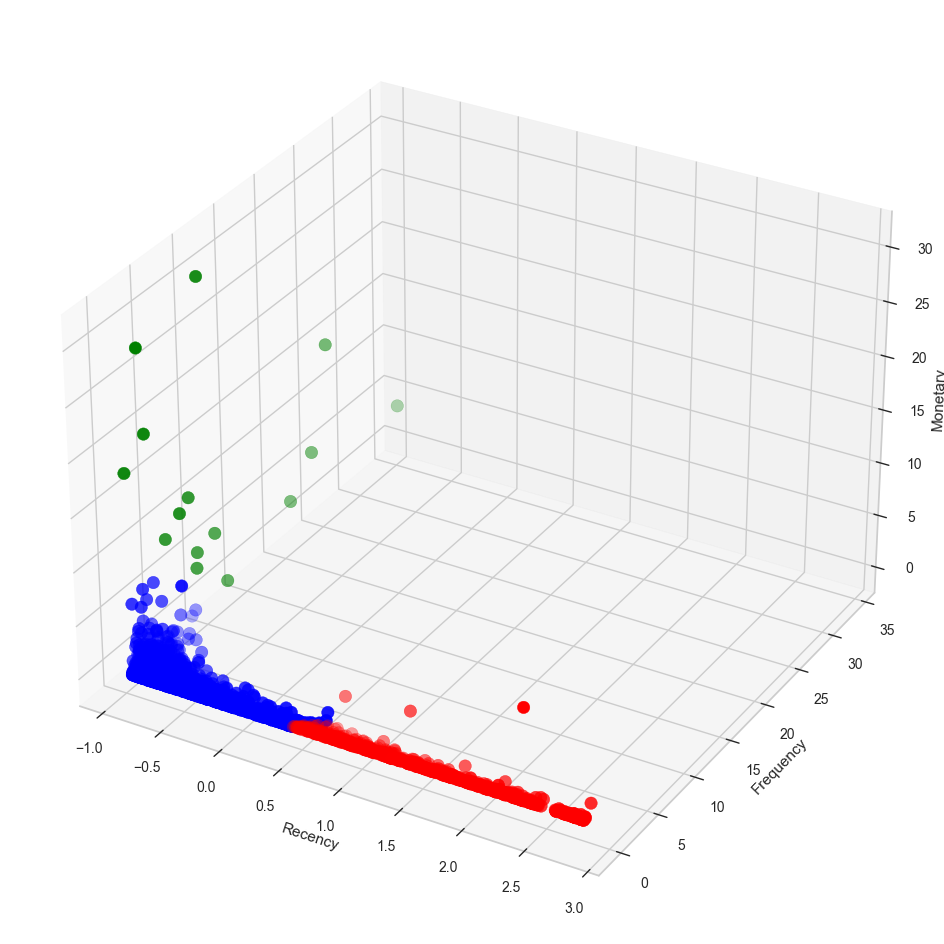

In [71]:
clusters = model.fit_predict(PCA_components.iloc[:, :2])
scaled_features["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(scaled_features.Recency[scaled_features['label'] == 0], scaled_features.Frequency[scaled_features['label'] == 0], scaled_features.Monetary[scaled_features['label'] == 0], c = 'blue', s = 80)
ax.scatter(scaled_features.Recency[scaled_features['label'] == 1], scaled_features.Frequency[scaled_features['label'] == 1], scaled_features.Monetary[scaled_features['label'] == 1], c = 'red', s = 80)
ax.scatter(scaled_features.Recency[scaled_features['label'] == 2], scaled_features.Frequency[scaled_features['label'] == 2], scaled_features.Monetary[scaled_features['label'] == 2], c = 'green', s = 80)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [72]:
pred = model.predict(PCA_components.iloc[:, :2])
frame = pd.DataFrame(customer_grouped)
frame['cluster'] = pred
frame.head()

CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency  Monetary   
0     12346.0 2011-01-18 10:01:00    2011-12-31      347          1  77183.60  \
1     12347.0 2011-12-07 15:52:00    2011-12-31       23        182   4310.00   
2     12348.0 2011-09-25 13:13:00    2011-12-31       96         31   1797.24   
3     12349.0 2011-11-21 09:51:00    2011-12-31       40         73   1757.55   
4     12350.0 2011-02-02 16:01:00    2011-12-31      331         17    334.40   

   RecencyRank  FrequencyRank  MonetaryRank  cluster  
0            0              0             9        1  
1            9              8             9        0  
2            3              4             7        0  
3            7              6             7        0  
4            0              2             2        1

In [73]:
customer_grouped

CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0        12346.0 2011-01-18 10:01:00    2011-12-31      347          1  \
1        12347.0 2011-12-07 15:52:00    2011-12-31       23        182   
2        12348.0 2011-09-25 13:13:00    2011-12-31       96         31   
3        12349.0 2011-11-21 09:51:00    2011-12-31       40         73   
4        12350.0 2011-02-02 16:01:00    2011-12-31      331         17   
...          ...                 ...           ...      ...        ...   
4334     18280.0 2011-03-07 09:52:00    2011-12-31      299         10   
4335     18281.0 2011-06-12 10:53:00    2011-12-31      202          7   
4336     18282.0 2011-12-02 11:43:00    2011-12-31       29         12   
4337     18283.0 2011-12-06 12:02:00    2011-12-31       24        756   
4338     18287.0 2011-10-28 09:29:00    2011-12-31       64         70   

      Monetary  RecencyRank  FrequencyRank  MonetaryRank  
0     77183.60            0              0             9  
1      4310.00            9              8             9  
2      1797.24            3              4             7  
3      1757.55            7              6             7  
4       334.40            0              2             2  
...        ...          ...            ...           ...  
4334    180.60            0              1             1  
4335     80.82            1              0             0  
4336    178.05            8              1             1  
4337   2094.88            9              9             8  
4338   1837.28            5              6             7  

[4339 rows x 9 columns]

In [74]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
avg_df

cluster    CustomerID               InvoiceDate|max ReferenceDate   
0        0  15285.381437 2011-10-29 15:33:24.255319040    2011-12-31  \
1        1  15345.335800 2011-04-06 20:21:46.901017600    2011-12-31   
2        2  15175.066667 2011-12-05 11:18:16.000000000    2011-12-31   

      Recency    Frequency       Monetary  RecencyRank  FrequencyRank   
0   62.226334   101.904718    2010.445258     5.742214       5.108541  \
1  268.049029    27.522664     636.736310     0.802035       2.470860   
2   25.466667  2513.000000  113548.132000     8.600000       8.400000   

   MonetaryRank  
0      5.158495  
1      2.460685  
2      9.000000

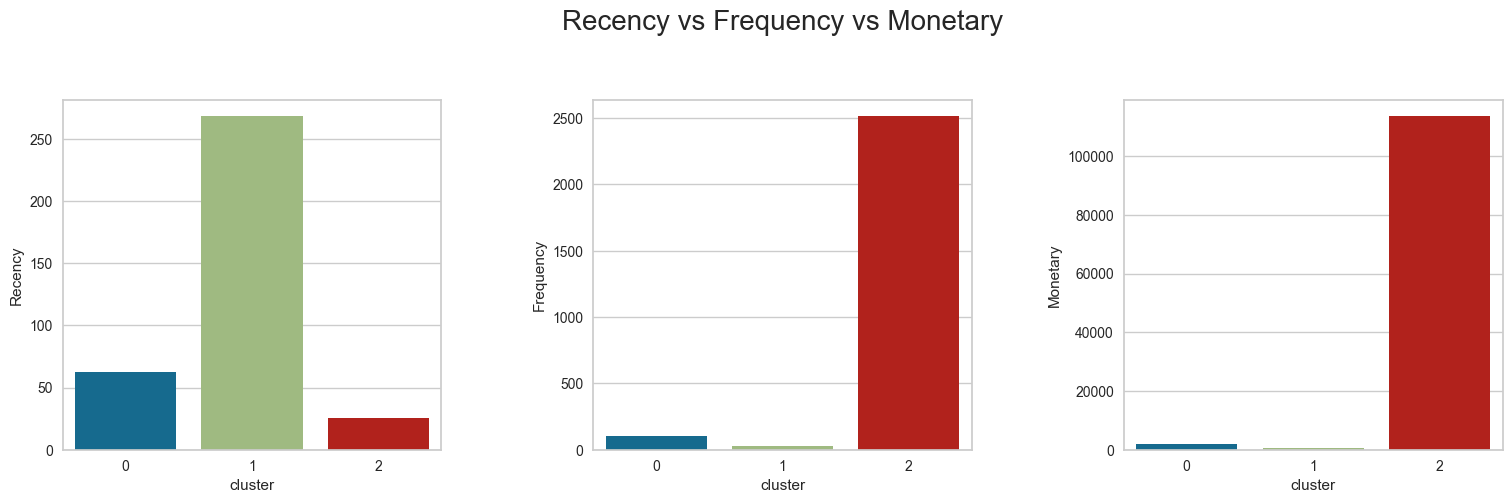

In [75]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='Recency',data=avg_df ,ax=ax[0])
sns.barplot(x='cluster',y='Frequency',data=avg_df, ax=ax[1])
sns.barplot(x='cluster',y='Monetary',data=avg_df, ax=ax[2])
plt.suptitle('Recency vs Frequency vs Monetary',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

Observations:
Cluster 0 - More like the middle-class customers in terms of recency, fequency, and monetary factors 
Cluster 1 - Least recent and least frequent purchasers, as well as least spenders
Cluster 2 - Most recent and most frequent purchasers, as well as biggest spenders

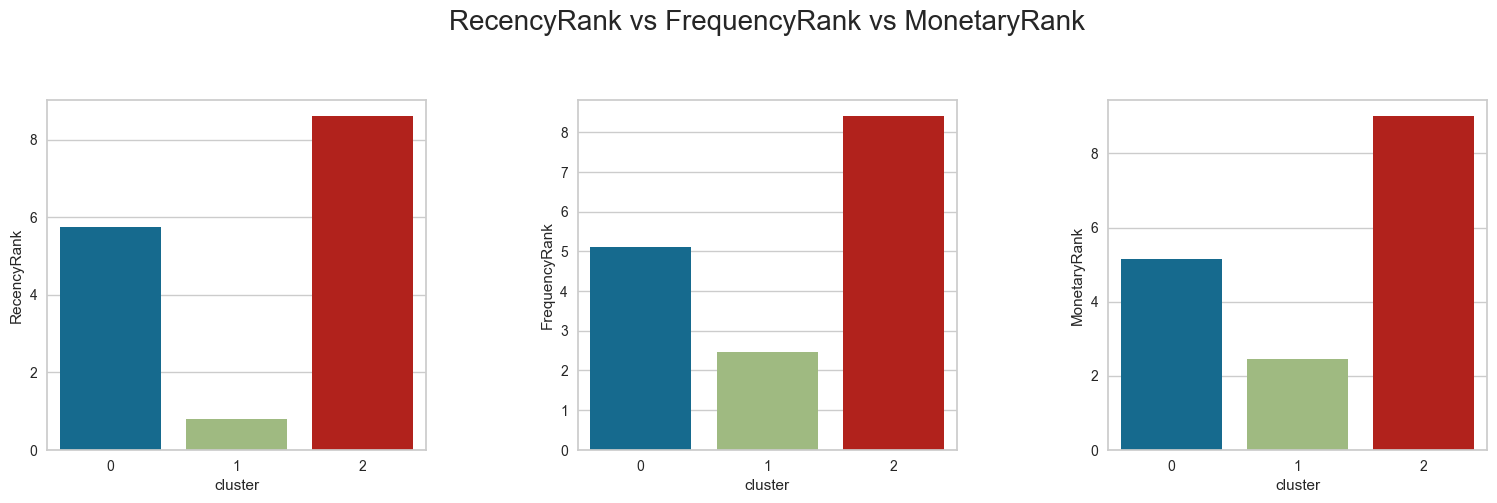

In [76]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='RecencyRank',data=avg_df ,ax=ax[0])
sns.barplot(x='cluster',y='FrequencyRank',data=avg_df, ax=ax[1])
sns.barplot(x='cluster',y='MonetaryRank',data=avg_df, ax=ax[2])
plt.suptitle('RecencyRank vs FrequencyRank vs MonetaryRank',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

Likely Observations:
Cluster 0 - Rank between 3 and 6 for the RFM factors
Cluster 1 - Rank between 0 and 3 for the RFM factors
Cluster 2 - Rank between 7 and 9 for the RFM factors

In [77]:
cluster0 = (frame.loc[frame['cluster'] == 0]).reset_index()
cluster0

index  CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0         1     12347.0 2011-12-07 15:52:00    2011-12-31       23        182  \
1         2     12348.0 2011-09-25 13:13:00    2011-12-31       96         31   
2         3     12349.0 2011-11-21 09:51:00    2011-12-31       40         73   
3         5     12352.0 2011-11-03 14:37:00    2011-12-31       57         85   
4         9     12356.0 2011-11-17 08:40:00    2011-12-31       44         59   
...     ...         ...                 ...           ...      ...        ...   
3238   4332     18277.0 2011-10-12 15:22:00    2011-12-31       79          8   
3239   4333     18278.0 2011-09-27 11:58:00    2011-12-31       95          9   
3240   4336     18282.0 2011-12-02 11:43:00    2011-12-31       29         12   
3241   4337     18283.0 2011-12-06 12:02:00    2011-12-31       24        756   
3242   4338     18287.0 2011-10-28 09:29:00    2011-12-31       64         70   

      Monetary  RecencyRank  FrequencyRank  MonetaryRank  cluster  
0      4310.00            9              8             9        0  
1      1797.24            3              4             7        0  
2      1757.55            7              6             7        0  
3      2506.04            5              7             8        0  
4      2811.43            6              6             8        0  
...        ...          ...            ...           ...      ...  
3238    110.38            4              1             0        0  
3239    173.90            3              1             1        0  
3240    178.05            8              1             1        0  
3241   2094.88            9              9             8        0  
3242   1837.28            5              6             7        0  

[3243 rows x 11 columns]

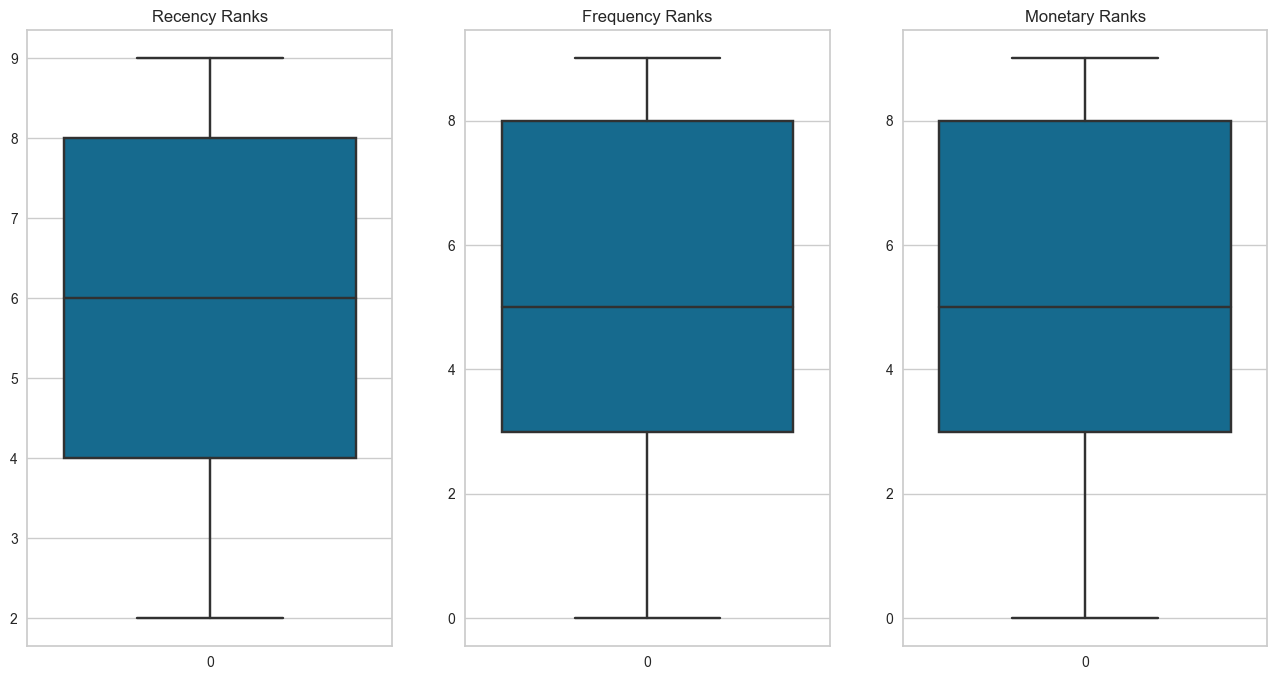

In [78]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(cluster0['RecencyRank']).title.set_text('Recency Ranks')
plt.subplot(1, 3, 2)
sns.boxplot(cluster0['FrequencyRank']).title.set_text('Frequency Ranks')
plt.subplot(1, 3, 3)
sns.boxplot(cluster0['MonetaryRank']).title.set_text('Monetary Ranks')
plt.show()

Corrected Observations:
- Average Rank between 4 and 8 for Recency
- Average Rank between 3 and 8 for Frequency
- Average Rank between 3 and 8 for Monetary

In [79]:
cluster1 = frame.loc[frame['cluster'] == 1].reset_index()
cluster1

index  CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0         0     12346.0 2011-01-18 10:01:00    2011-12-31      347          1  \
1         4     12350.0 2011-02-02 16:01:00    2011-12-31      331         17   
2         6     12353.0 2011-05-19 17:47:00    2011-12-31      225          4   
3         7     12354.0 2011-04-21 13:11:00    2011-12-31      253         58   
4         8     12355.0 2011-05-09 13:49:00    2011-12-31      235         13   
...     ...         ...                 ...           ...      ...        ...   
1076   4320     18260.0 2011-06-20 12:37:00    2011-12-31      193        134   
1077   4322     18262.0 2011-07-22 16:04:00    2011-12-31      161         13   
1078   4326     18269.0 2010-12-08 13:53:00    2011-12-31      387          7   
1079   4334     18280.0 2011-03-07 09:52:00    2011-12-31      299         10   
1080   4335     18281.0 2011-06-12 10:53:00    2011-12-31      202          7   

      Monetary  RecencyRank  FrequencyRank  MonetaryRank  cluster  
0     77183.60            0              0             9        1  
1       334.40            0              2             2        1  
2        89.00            1              0             0        1  
3      1079.40            1              5             6        1  
4       459.40            1              1             3        1  
...        ...          ...            ...           ...      ...  
1076   2643.20            2              8             8        1  
1077    149.48            2              1             0        1  
1078    168.60            0              0             1        1  
1079    180.60            0              1             1        1  
1080     80.82            1              0             0        1  

[1081 rows x 11 columns]

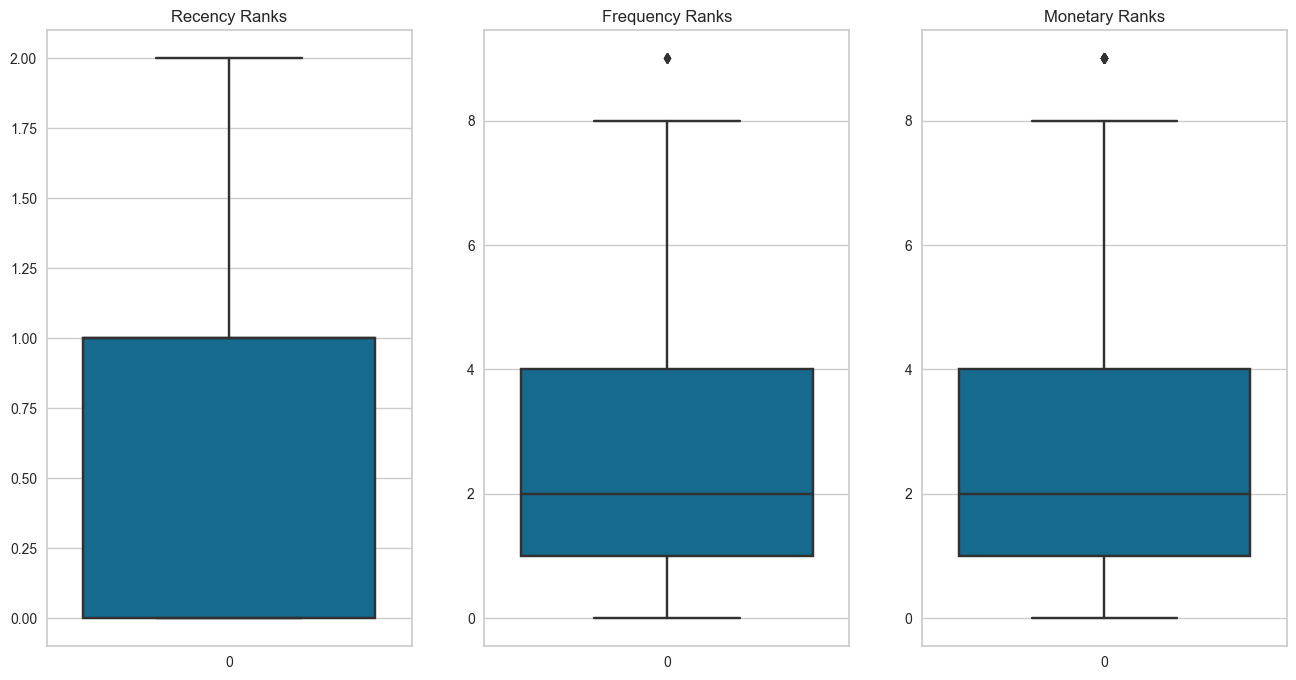

In [80]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(cluster1['RecencyRank']).title.set_text('Recency Ranks')
plt.subplot(1, 3, 2)
sns.boxplot(cluster1['FrequencyRank']).title.set_text('Frequency Ranks')
plt.subplot(1, 3, 3)
sns.boxplot(cluster1['MonetaryRank']).title.set_text('Monetary Ranks')
plt.show()

Corrected Observations:
- Average Rank between 0 and 1 for Recency
- Average Rank between 1 and 4 for Frequency
- Average Rank between 1 and 4 for Monetary

In [81]:
cluster1_outliers = cluster1.loc[(cluster1['FrequencyRank'] > 8) | (cluster1['MonetaryRank'] > 8)].reset_index()
cluster1_outliers

level_0  index  CustomerID     InvoiceDate|max ReferenceDate  Recency   
0         0      0     12346.0 2011-01-18 10:01:00    2011-12-31      347  \
1        43    196     12590.0 2011-05-12 14:52:00    2011-12-31      232   
2        70    332     12755.0 2011-03-04 12:42:00    2011-12-31      301   
3       118    485     12980.0 2011-07-05 09:34:00    2011-12-31      179   
4       138    566     13093.0 2011-03-09 12:14:00    2011-12-31      296   
5       295   1231     14016.0 2011-07-01 11:29:00    2011-12-31      183   
6       397   1640     14573.0 2011-06-13 11:15:00    2011-12-31      201   
7       471   1959     15032.0 2011-03-28 15:03:00    2011-12-31      277   
8       488   2012     15098.0 2011-06-10 15:33:00    2011-12-31      203   
9       549   2226     15379.0 2011-06-23 13:13:00    2011-12-31      190   
10      598   2423     15644.0 2011-06-26 14:54:00    2011-12-31      187   
11      621   2503     15749.0 2011-04-18 13:20:00    2011-12-31      256   
12      630   2547     15808.0 2011-02-06 14:33:00    2011-12-31      327   
13      766   3084     16553.0 2011-06-29 15:42:00    2011-12-31      184   
14      978   4017     17850.0 2010-12-02 15:27:00    2011-12-31      393   

    Frequency  Monetary  RecencyRank  FrequencyRank  MonetaryRank  cluster  
0           1  77183.60            0              0             9        1  
1          68   9864.26            1              6             9        1  
2           4   3811.95            0              0             9        1  
3          20   7374.90            2              2             9        1  
4         159   7832.47            0              8             9        1  
5         161   4341.21            2              8             9        1  
6         235   1653.42            1              9             7        1  
7          52   4959.10            1              5             9        1  
8           3  39916.50            1              0             9        1  
9         194   3703.29            2              8             9        1  
10        238    813.00            2              9             5        1  
11         10  44534.30            1              1             9        1  
12        208   3734.97            0              8             9        1  
13         84   5719.82            2              7             9        1  
14        297   5391.21            0              9             9        1

The cluster 1 customers are generally the customers with the least value. However, the outlier customers in that cluster possibly hold a lot of potential. They are customers who although they are ranked low in terms of recency, they have either made multiple(frequent) or high-value(monetary) purchases in the past. Think customer churn...Think business reactivation!

In [82]:
cluster2 = frame.loc[frame['cluster'] == 2].reset_index()
cluster2

index  CustomerID     InvoiceDate|max ReferenceDate  Recency  Frequency   
0      55     12415.0 2011-11-15 14:22:00    2011-12-31       45        716  \
1     326     12748.0 2011-12-09 12:20:00    2011-12-31       21       4596   
2     562     13089.0 2011-12-07 09:02:00    2011-12-31       24       1818   
3    1290     14096.0 2011-12-05 17:17:00    2011-12-31       25       5111   
4    1334     14156.0 2011-11-30 10:54:00    2011-12-31       31       1400   
5    1435     14298.0 2011-12-01 13:12:00    2011-12-31       29       1637   
6    1662     14606.0 2011-12-08 19:28:00    2011-12-31       22       2700   
7    1690     14646.0 2011-12-08 12:12:00    2011-12-31       22       2080   
8    1880     14911.0 2011-12-08 15:54:00    2011-12-31       22       5677   
9    2177     15311.0 2011-12-09 12:00:00    2011-12-31       22       2379   
10   3009     16446.0 2011-12-09 09:15:00    2011-12-31       22          3   
11   3729     17450.0 2011-12-01 13:29:00    2011-12-31       29        337   
12   3772     17511.0 2011-12-07 10:12:00    2011-12-31       24        963   
13   4011     17841.0 2011-12-08 12:07:00    2011-12-31       22       7847   
14   4202     18102.0 2011-12-09 11:50:00    2011-12-31       22        431   

     Monetary  RecencyRank  FrequencyRank  MonetaryRank  cluster  
0   124914.53            6              9             9        2  
1    33719.73            9              9             9        2  
2    58825.83            9              9             9        2  
3    65164.79            9              9             9        2  
4   117379.63            8              9             9        2  
5    51527.30            8              9             9        2  
6    12156.65            9              9             9        2  
7   280206.02            9              9             9        2  
8   143825.06            9              9             9        2  
9    60767.90            9              9             9        2  
10  168472.50            9              0             9        2  
11  194550.79            8              9             9        2  
12   91062.38            9              9             9        2  
13   40991.57            9              9             9        2  
14  259657.30            9              9             9        2

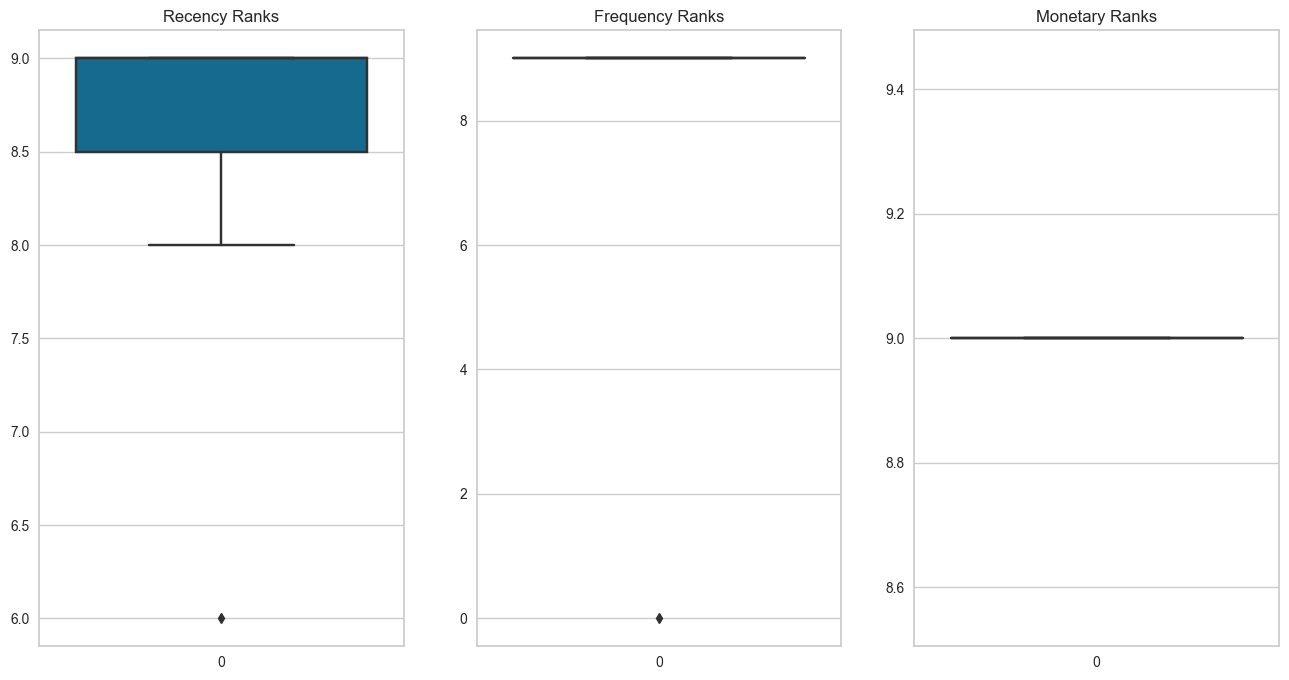

In [83]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(cluster2['RecencyRank']).title.set_text('Recency Ranks')
plt.subplot(1, 3, 2)
sns.boxplot(cluster2['FrequencyRank']).title.set_text('Frequency Ranks')
plt.subplot(1, 3, 3)
sns.boxplot(cluster2['MonetaryRank']).title.set_text('Monetary Ranks')
plt.show()

Corrected Observations:
- Average Rank between 8 and 9 for Recency
- Average Rank is 9 for Frequency
- Average Rank is 9 for Monetary

In [84]:
cluster2_outliers = cluster2.loc[(cluster2['RecencyRank'] < 8) | (cluster2['FrequencyRank'] < 9)].reset_index()
cluster2_outliers

level_0  index  CustomerID     InvoiceDate|max ReferenceDate  Recency   
0        0     55     12415.0 2011-11-15 14:22:00    2011-12-31       45  \
1       10   3009     16446.0 2011-12-09 09:15:00    2011-12-31       22   

   Frequency   Monetary  RecencyRank  FrequencyRank  MonetaryRank  cluster  
0        716  124914.53            6              9             9        2  
1          3  168472.50            9              0             9        2

The cluster 2 customers are generally the customers with the most value. The outlier customer 12415 is probably a seasonal customer and the customer 16446 is probably a new customer.z